__1. Импорт библиотек__

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

__2. Загрузка данных__

In [8]:
print("\n" + "="*70)
print("2. ЗАГРУЗКА ДАННЫХ")
print("="*70)

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(f"Размер train: {train.shape}")
print(f"Размер test: {test.shape}")

print("\nПервые 5 строк train:")
print(train.head())

print("\nИнформация о данных train:")
print(train.info())

print("\nПропущенные значения в train:")
print(train.isnull().sum())
print("Всего пропусков в train:")
print(train.isnull().sum().sum())


2. ЗАГРУЗКА ДАННЫХ
Размер train: (11017, 35)
Размер test: (5000, 35)

Первые 5 строк train:
  ApplicationDate   Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration  \
0      2010-06-26  27.0       66829.0        549.0     17290.0          60.0   
1      1996-09-23  55.0      172147.0        850.0     16110.0          36.0   
2      2015-01-19  51.0      300000.0        850.0     38436.0          36.0   
3      1981-05-12  25.0       34683.0        847.0     19186.0          48.0   
4      1995-05-07  55.0      300000.0        850.0     30437.0          48.0   

  MaritalStatus  NumberOfDependents HomeOwnershipStatus  MonthlyDebtPayments  \
0      Divorced                 1.0                Rent               1095.0   
1       Widowed                 1.0            Mortgage                211.0   
2       Married                 0.0            Mortgage                546.0   
3       Married                 0.0               Other                153.0   
4        Single           

__3. Очистка данных от пропусков в целевой переменной__

In [9]:
print("\n" + "="*70)
print("3. ОЧИСТКА ДАННЫХ ОТ ПРОПУСКОВ")
print("="*70)

print(f"Количество пропусков в RiskScore: {train['RiskScore'].isnull().sum()}")
train_clean = train.dropna(subset=['RiskScore'])

print(f"Размер данных после удаления строк с пропущенным RiskScore: {train_clean.shape}")

print("\nТипы данных в датасете:")
print(train_clean.dtypes)

numeric_cols = train_clean.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train_clean.select_dtypes(include=['object']).columns.tolist()

print(f"\nЧисловые колонки ({len(numeric_cols)}): {numeric_cols[:5]}...")
print(f"Категориальные колонки ({len(categorical_cols)}): {categorical_cols}")

print("\nПропущенные значения после удаления строк с пропущенным RiskScore:")
missing_after = train_clean.isnull().sum()
print(missing_after[missing_after > 0])


3. ОЧИСТКА ДАННЫХ ОТ ПРОПУСКОВ
Количество пропусков в RiskScore: 530
Размер данных после удаления строк с пропущенным RiskScore: (10487, 35)

Типы данных в датасете:
ApplicationDate                object
Age                           float64
AnnualIncome                  float64
CreditScore                   float64
LoanAmount                    float64
LoanDuration                  float64
MaritalStatus                  object
NumberOfDependents            float64
HomeOwnershipStatus            object
MonthlyDebtPayments           float64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines       float64
NumberOfCreditInquiries       float64
DebtToIncomeRatio             float64
BankruptcyHistory             float64
LoanPurpose                    object
PreviousLoanDefaults          float64
PaymentHistory                float64
LengthOfCreditHistory         float64
SavingsAccountBalance         float64
CheckingAccountBalance        float64
TotalAssets                   float

__4. Обработка пропусков в признаках__

In [10]:
print("\n" + "="*70)
print("4. ОБРАБОТКА ПРОПУСКОВ В ЧИСЛОВЫХ КОЛОНКАХ")
print("="*70)

train_processed = train_clean.copy()

for col in numeric_cols:
    if train_processed[col].isnull().sum() > 0:
        median_val = train_processed[col].median()
        train_processed[col] = train_processed[col].fillna(median_val)
        print(f"  {col}: заполнено {train_processed[col].isnull().sum()} пропусков медианой {median_val:.4f}")

remaining_missing_numeric = train_processed[numeric_cols].isnull().sum().sum()
print(f"\nОсталось пропусков в числовых колонках: {remaining_missing_numeric}")

print("\nОбработка категориальных колонок:")
for col in categorical_cols:
    if train_processed[col].isnull().sum() > 0:
        mode_val = train_processed[col].mode()[0] if not train_processed[col].mode().empty else 'Missing'
        train_processed[col] = train_processed[col].fillna(mode_val)
        print(f"  {col}: заполнено {train_processed[col].isnull().sum()} пропусков значением '{mode_val}'")

total_missing = train_processed.isnull().sum().sum()
print(f"\nВсего пропусков после обработки: {total_missing}")


4. ОБРАБОТКА ПРОПУСКОВ В ЧИСЛОВЫХ КОЛОНКАХ
  CreditScore: заполнено 0 пропусков медианой 722.5000
  LoanAmount: заполнено 0 пропусков медианой 21828.5000
  MonthlyDebtPayments: заполнено 0 пропусков медианой 398.0000
  BankruptcyHistory: заполнено 0 пропусков медианой 0.0000
  CheckingAccountBalance: заполнено 0 пропусков медианой 1122.5000
  TotalAssets: заполнено 0 пропусков медианой 60543.5000
  NetWorth: заполнено 0 пропусков медианой 27429.5000
  BaseInterestRate: заполнено 0 пропусков медианой 0.1820

Осталось пропусков в числовых колонках: 0

Обработка категориальных колонок:
  LoanPurpose: заполнено 0 пропусков значением 'Home'

Всего пропусков после обработки: 0


__5. EDA__


5. РАЗВЕДОЧНЫЙ АНАЛИЗ ДАННЫХ (EDA)


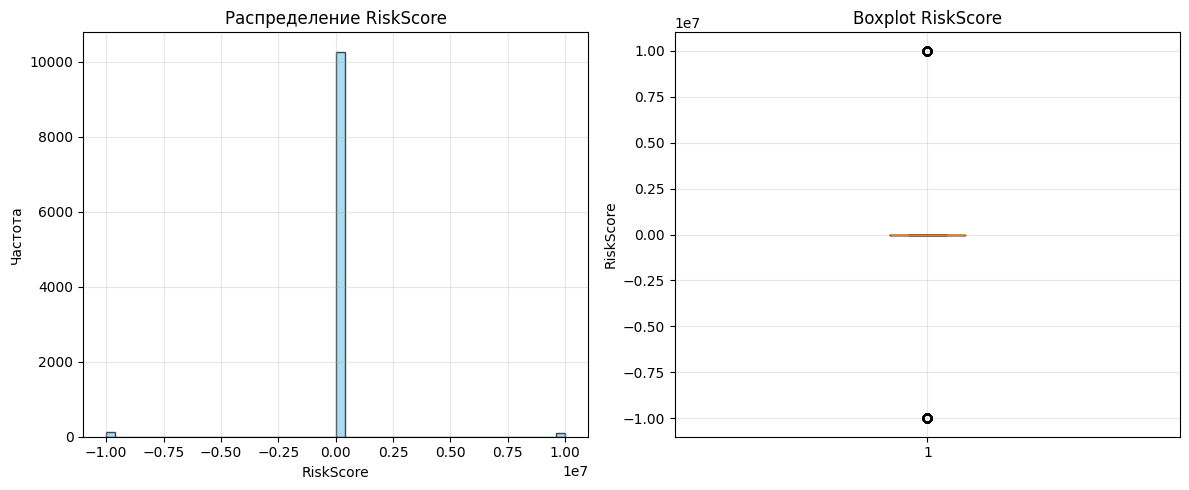


Статистика целевой переменной (RiskScore):
  Минимум: -9999999.00
  Максимум: 10000000.00
  Среднее: -25698.78
  Медиана: 44.12
  Стандартное отклонение: 1431674.59


In [11]:
print("\n" + "="*70)
print("5. РАЗВЕДОЧНЫЙ АНАЛИЗ ДАННЫХ (EDA)")
print("="*70)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(train_processed['RiskScore'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Распределение RiskScore')
plt.xlabel('RiskScore')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(train_processed['RiskScore'])
plt.title('Boxplot RiskScore')
plt.ylabel('RiskScore')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nСтатистика целевой переменной (RiskScore):")
print(f"  Минимум: {train_processed['RiskScore'].min():.2f}")
print(f"  Максимум: {train_processed['RiskScore'].max():.2f}")
print(f"  Среднее: {train_processed['RiskScore'].mean():.2f}")
print(f"  Медиана: {train_processed['RiskScore'].median():.2f}")
print(f"  Стандартное отклонение: {train_processed['RiskScore'].std():.2f}")

__6. Обработка выбросов в целевой переменной__


6. ОБРАБОТКА ВЫБРОСОВ В ЦЕЛЕВОЙ ПЕРЕМЕННОЙ
Процентили RiskScore:
   1.00%: -9999999.00
  10.00%: -9999999.00
  100.00%: -9999999.00
  500.00%:      25.98
  1000.00%:      28.31
  2500.00%:      32.56
  5000.00%:      44.12
  7500.00%:      65.36
  9000.00%:      72.59
  9500.00%:      76.46
  9900.00%:      90.22
  9990.00%: 10000000.00
  9999.00%: 10000000.00

Предлагаемые границы (0.5 и 99.5 процентили):
  Нижняя граница: -9999999.00
  Верхняя граница: 10000000.00

Границы по IQR (1.5*IQR):
  Q1: 32.56, Q3: 65.36, IQR: 32.79
  Нижняя граница (Q1 - 1.5*IQR): -16.62
  Верхняя граница (Q3 + 1.5*IQR): 114.55

Количество выбросов по IQR (1.5*IQR): 215 (2.05%)


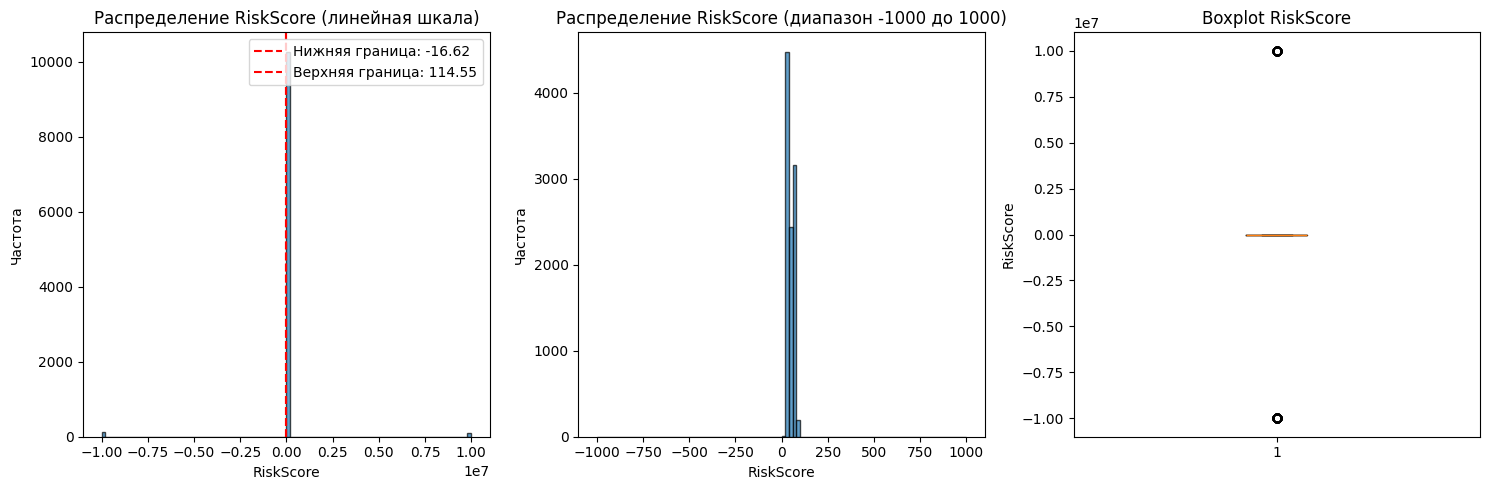


Принимаем решение удалить выбросы по методу IQR (1.5*IQR).
Размер данных до удаления выбросов: (10487, 35)
Размер данных после удаления выбросов: (10272, 35)
Удалено строк: 215 (2.05%)

Статистика RiskScore после удаления выбросов:
  Минимум: 14.84
  Максимум: 97.60
  Среднее: 48.36
  Медиана: 44.20
  Стандартное отклонение: 17.24


In [13]:
print("\n" + "="*70)
print("6. ОБРАБОТКА ВЫБРОСОВ В ЦЕЛЕВОЙ ПЕРЕМЕННОЙ")
print("="*70)

percentiles = [0.01, 0.1, 1, 5, 10, 25, 50, 75, 90, 95, 99, 99.9, 99.99]
percentile_values = np.percentile(train_processed['RiskScore'], percentiles)

print("Процентили RiskScore:")
for p, v in zip(percentiles, percentile_values):
    print(f"  {p*100:5.2f}%: {v:10.2f}")

lower_bound = np.percentile(train_processed['RiskScore'], 0.5)
upper_bound = np.percentile(train_processed['RiskScore'], 99.5)

print(f"\nПредлагаемые границы (0.5 и 99.5 процентили):")
print(f"  Нижняя граница: {lower_bound:.2f}")
print(f"  Верхняя граница: {upper_bound:.2f}")

Q1 = train_processed['RiskScore'].quantile(0.25)
Q3 = train_processed['RiskScore'].quantile(0.75)
IQR = Q3 - Q1

lower_iqr = Q1 - 1.5 * IQR
upper_iqr = Q3 + 1.5 * IQR

print(f"\nГраницы по IQR (1.5*IQR):")
print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"  Нижняя граница (Q1 - 1.5*IQR): {lower_iqr:.2f}")
print(f"  Верхняя граница (Q3 + 1.5*IQR): {upper_iqr:.2f}")

outliers_iqr = train_processed[(train_processed['RiskScore'] < lower_iqr) | (train_processed['RiskScore'] > upper_iqr)]
print(f"\nКоличество выбросов по IQR (1.5*IQR): {len(outliers_iqr)} ({len(outliers_iqr)/len(train_processed)*100:.2f}%)")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(train_processed['RiskScore'], bins=100, edgecolor='black', alpha=0.7)
axes[0].set_title('Распределение RiskScore (линейная шкала)')
axes[0].set_xlabel('RiskScore')
axes[0].set_ylabel('Частота')
axes[0].axvline(lower_iqr, color='red', linestyle='--', label=f'Нижняя граница: {lower_iqr:.2f}')
axes[0].axvline(upper_iqr, color='red', linestyle='--', label=f'Верхняя граница: {upper_iqr:.2f}')
axes[0].legend()

axes[1].hist(train_processed['RiskScore'], bins=100, edgecolor='black', alpha=0.7, range=(-1000, 1000))
axes[1].set_title('Распределение RiskScore (диапазон -1000 до 1000)')
axes[1].set_xlabel('RiskScore')
axes[1].set_ylabel('Частота')

axes[2].boxplot(train_processed['RiskScore'])
axes[2].set_title('Boxplot RiskScore')
axes[2].set_ylabel('RiskScore')

plt.tight_layout()
plt.show()

print("\nПринимаем решение удалить выбросы по методу IQR (1.5*IQR).")
train_no_outliers = train_processed[(train_processed['RiskScore'] >= lower_iqr) & (train_processed['RiskScore'] <= upper_iqr)]

print(f"Размер данных до удаления выбросов: {train_processed.shape}")
print(f"Размер данных после удаления выбросов: {train_no_outliers.shape}")
print(f"Удалено строк: {len(train_processed) - len(train_no_outliers)} ({100*(len(train_processed)-len(train_no_outliers))/len(train_processed):.2f}%)")

print("\nСтатистика RiskScore после удаления выбросов:")
print(f"  Минимум: {train_no_outliers['RiskScore'].min():.2f}")
print(f"  Максимум: {train_no_outliers['RiskScore'].max():.2f}")
print(f"  Среднее: {train_no_outliers['RiskScore'].mean():.2f}")
print(f"  Медиана: {train_no_outliers['RiskScore'].median():.2f}")
print(f"  Стандартное отклонение: {train_no_outliers['RiskScore'].std():.2f}")

__7. Матрица корреляций__


7. МАТРИЦА КОРРЕЛЯЦИЙ

Топ-10 признаков по корреляции с RiskScore:
  RiskScore                     : 1.0000
  InterestRate                  : 0.7426
  BaseInterestRate              : 0.7404
  TotalDebtToIncomeRatio        : 0.5307
  BankruptcyHistory             : 0.1731
  MonthlyLoanPayment            : 0.1508
  DebtToIncomeRatio             : 0.1109
  LoanAmount                    : 0.0827
  CreditCardUtilizationRate     : 0.0561
  PreviousLoanDefaults          : 0.0550


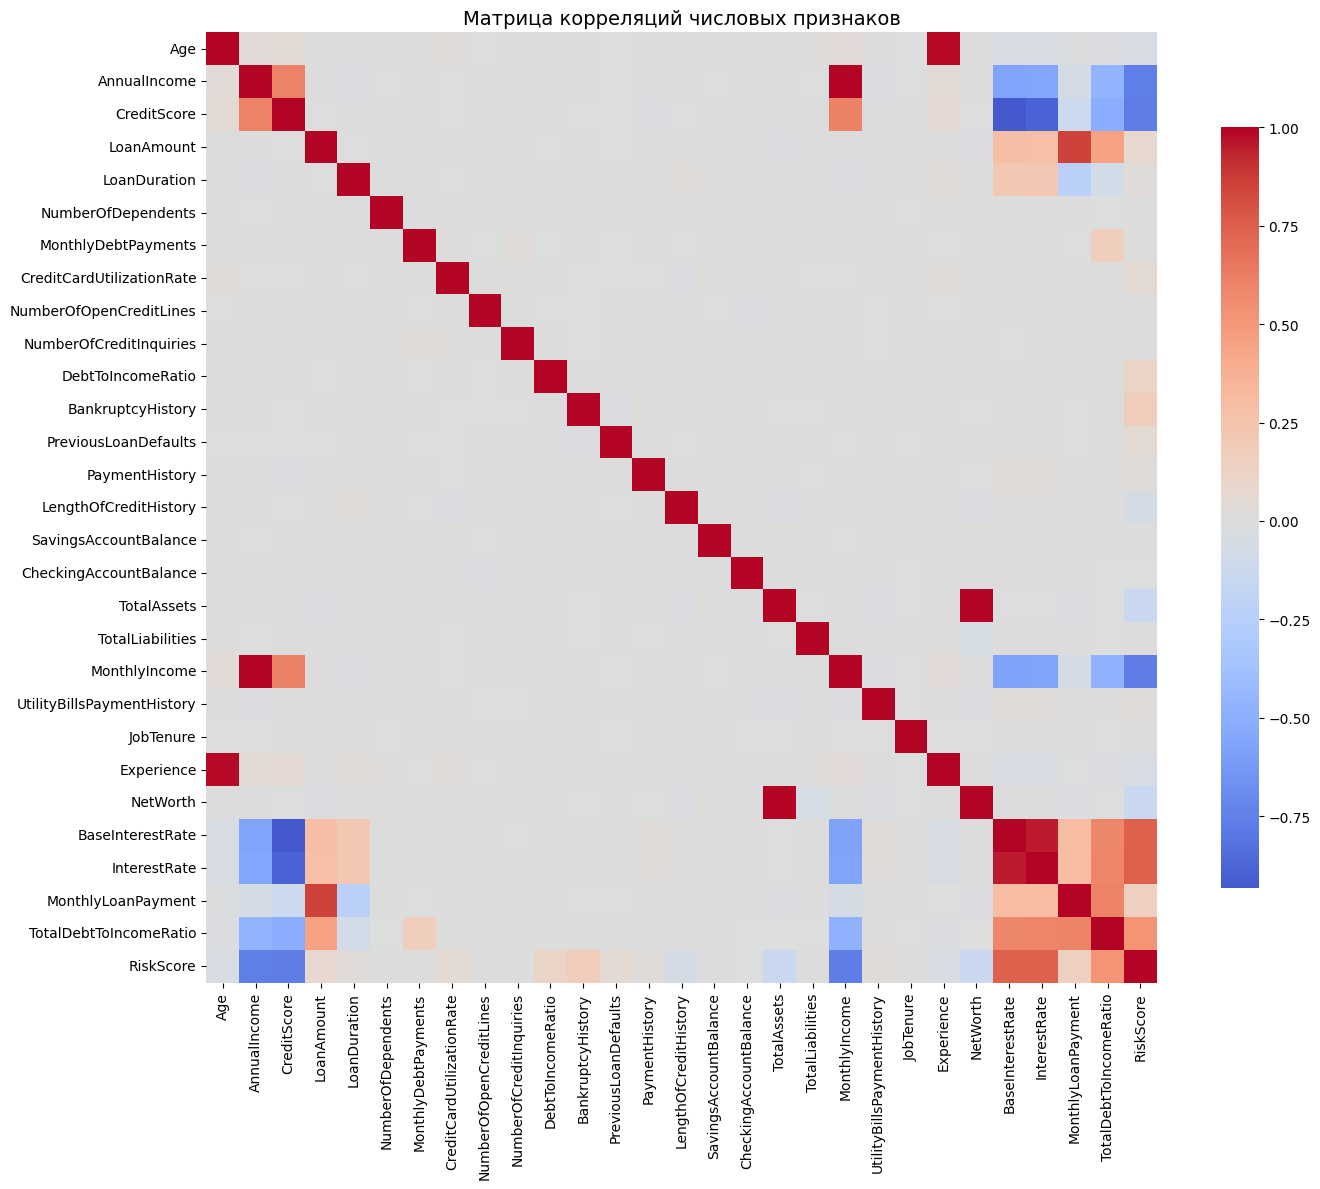


Топ-5 положительно коррелирующих признаков: ['InterestRate', 'BaseInterestRate', 'TotalDebtToIncomeRatio', 'BankruptcyHistory', 'MonthlyLoanPayment']
Топ-5 отрицательно коррелирующих признаков: ['NetWorth', 'TotalAssets', 'AnnualIncome', 'CreditScore', 'MonthlyIncome']


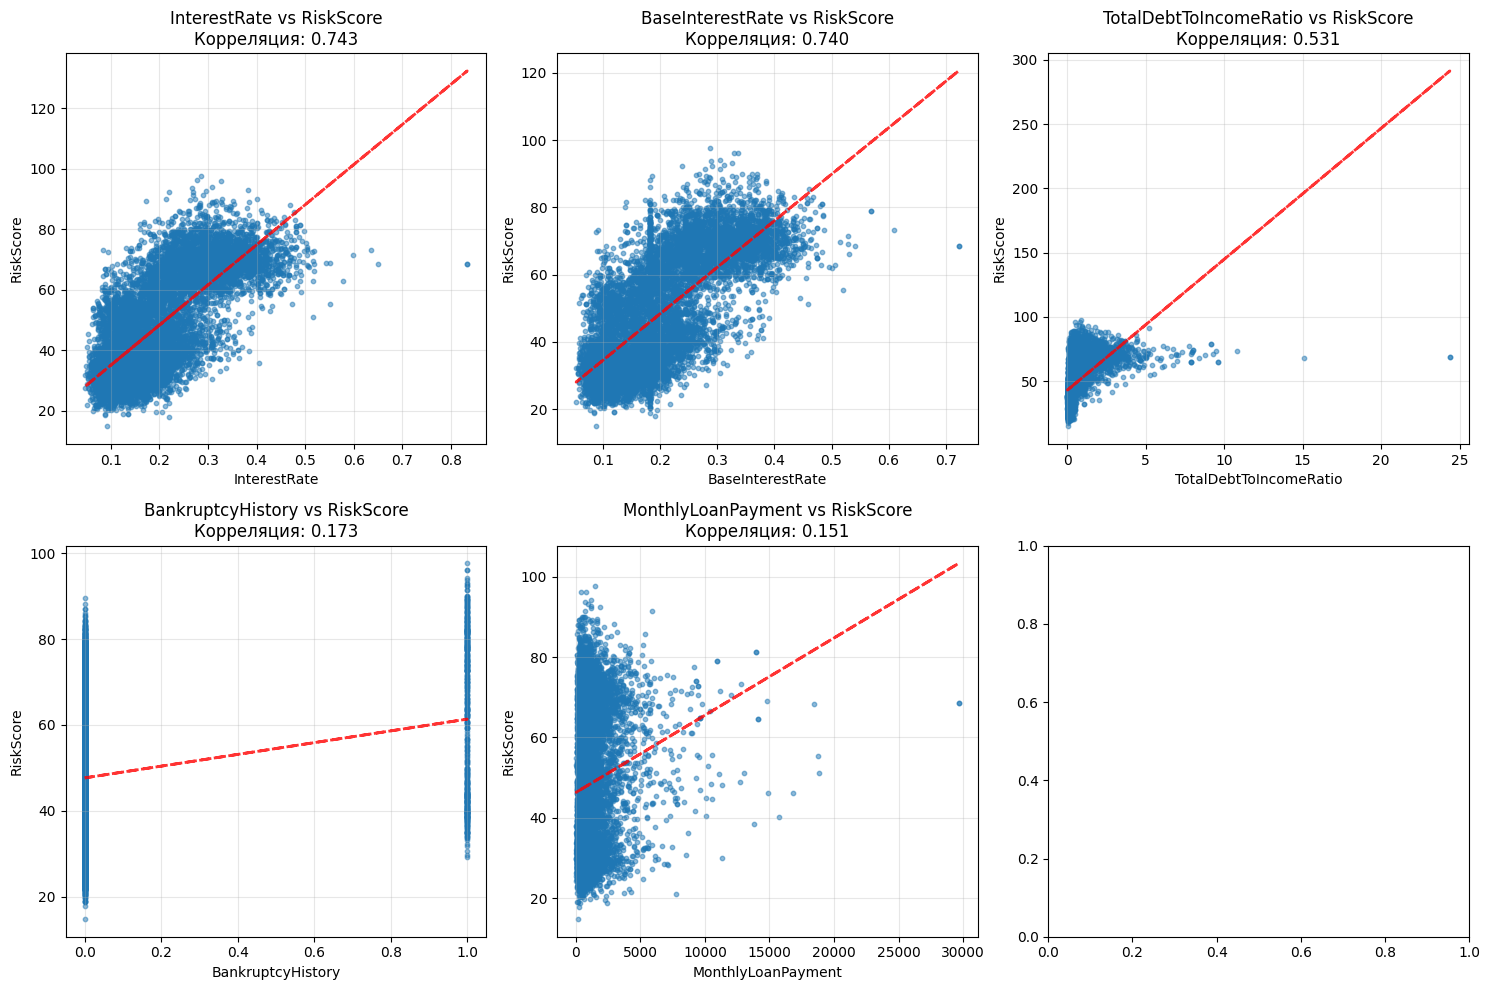

In [ ]:
print("\n" + "="*70)
print("7. МАТРИЦА КОРРЕЛЯЦИЙ")
print("="*70)

train_clean = train_no_outliers

numeric_cols = train_clean.select_dtypes(include=[np.number]).columns
corr_matrix = train_clean[numeric_cols].corr()

print("\nТоп-10 признаков по корреляции с RiskScore:")
corr_with_target = corr_matrix['RiskScore'].sort_values(ascending=False)
for i, (feature, corr) in enumerate(corr_with_target.items()):
    if i < 10:
        print(f"  {feature:30}: {corr:.4f}")

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=False, fmt='.2f', cmap='coolwarm', center=0,
            square=True, cbar_kws={"shrink": 0.8})
plt.title('Матрица корреляций числовых признаков', fontsize=14)
plt.tight_layout()
plt.show()

top_features = corr_with_target.drop('RiskScore').head(5).index.tolist()
bottom_features = corr_with_target.drop('RiskScore').tail(5).index.tolist()

print(f"\nТоп-5 положительно коррелирующих признаков: {top_features}")
print(f"Топ-5 отрицательно коррелирующих признаков: {bottom_features}")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(top_features[:6]):
    if i < len(axes):
        axes[i].scatter(train_clean[feature], train_clean['RiskScore'], alpha=0.5, s=10)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('RiskScore')
        axes[i].set_title(f'{feature} vs RiskScore\nКорреляция: {corr_with_target[feature]:.3f}')
        axes[i].grid(True, alpha=0.3)

        try:
            z = np.polyfit(train_clean[feature], train_clean['RiskScore'], 1)
            p = np.poly1d(z)
            axes[i].plot(train_clean[feature], p(train_clean[feature]), "r--", alpha=0.8, linewidth=2)
        except:
            pass

plt.tight_layout()
plt.show()

__8. Подготовка к мделированию__

In [15]:
print("\n" + "="*70)
print("8. ПОДГОТОВКА ДАННЫХ ДЛЯ МОДЕЛИРОВАНИЯ")
print("="*70)

df = train_clean.copy()

X = df.drop('RiskScore', axis=1)
y = df['RiskScore']

print(f"Размер X: {X.shape}")
print(f"Размер y: {y.shape}")

categorical_cols = X.select_dtypes(include=['object']).columns
print(f"\nКатегориальные колонки: {list(categorical_cols)}")

if 'ApplicationDate' in categorical_cols:
    print("Преобразование ApplicationDate в числовой формат...")
    X['ApplicationDate'] = pd.to_datetime(X['ApplicationDate'], errors='coerce')
    median_date = X['ApplicationDate'].median()
    X['ApplicationDate'] = X['ApplicationDate'].fillna(median_date)
    min_date = X['ApplicationDate'].min()
    X['ApplicationDate'] = (X['ApplicationDate'] - min_date).dt.days
    print(f"  ApplicationDate преобразован в количество дней от {min_date.date()}")

categorical_cols = X.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print(f"\nПрименение one-hot encoding к {len(categorical_cols)} категориальным колонкам...")
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
    print(f"  После one-hot encoding: {X.shape[1]} признаков")

print(f"\nИтоговый размер X после обработки: {X.shape}")

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\nРазделение данных:")
print(f"  X_train: {X_train.shape}")
print(f"  X_val: {X_val.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  y_val: {y_val.shape}")


8. ПОДГОТОВКА ДАННЫХ ДЛЯ МОДЕЛИРОВАНИЯ
Размер X: (10272, 34)
Размер y: (10272,)

Категориальные колонки: ['ApplicationDate', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel']
Преобразование ApplicationDate в числовой формат...
  ApplicationDate преобразован в количество дней от 1979-01-01

Применение one-hot encoding к 5 категориальным колонкам...
  После one-hot encoding: 45 признаков

Итоговый размер X после обработки: (10272, 45)

Разделение данных:
  X_train: (8217, 45)
  X_val: (2055, 45)
  y_train: (8217,)
  y_val: (2055,)


__9. Нормализация данных__

In [ ]:
print("\n" + "="*70)
print("9. НОРМАЛИЗАЦИЯ ДАННЫХ")
print("="*70)

X_train_np = X_train.values
X_val_np = X_val.values
y_train_np = y_train.values
y_val_np = y_val.values

print(f"Тип данных X_train_np: {type(X_train_np)}, форма: {X_train_np.shape}")
print(f"Тип данных y_train_np: {type(y_train_np)}, форма: {y_train_np.shape}")

class DataNormalizer:

    @staticmethod
    def z_score_normalization(X):
        X = np.array(X, dtype=np.float64)
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        std[std == 0] = 1
        X_normalized = (X - mean) / std
        return X_normalized, mean, std

    @staticmethod
    def z_score_denormalization(X_normalized, mean, std):
        return X_normalized * std + mean

    @staticmethod
    def min_max_normalization(X, feature_range=(0, 1)):
        X = np.array(X, dtype=np.float64)
        min_vals = np.min(X, axis=0)
        max_vals = np.max(X, axis=0)

        range_vals = max_vals - min_vals
        range_vals[range_vals == 0] = 1

        X_normalized = (X - min_vals) / range_vals

        X_normalized = X_normalized * (feature_range[1] - feature_range[0]) + feature_range[0]

        return X_normalized, min_vals, max_vals, feature_range

    @staticmethod
    def min_max_denormalization(X_normalized, min_vals, max_vals, feature_range=(0, 1)):
        X_scaled = (X_normalized - feature_range[0]) / (feature_range[1] - feature_range[0])
        range_vals = max_vals - min_vals
        range_vals[range_vals == 0] = 1
        return X_scaled * range_vals + min_vals

print("\n1. Z-score нормализация:")
X_train_z, mean_train, std_train = DataNormalizer.z_score_normalization(X_train_np)
X_val_z = (X_val_np - mean_train) / std_train

print(f"  X_train после z-score:")
print(f"    Среднее: {np.mean(X_train_z, axis=0)[:3].round(3)}...")
print(f"    Стандартное отклонение: {np.std(X_train_z, axis=0)[:3].round(3)}...")

print("\n2. Min-max нормализация:")
X_train_mm, min_train, max_train, feature_range = DataNormalizer.min_max_normalization(X_train_np, feature_range=(0, 1))
X_val_mm = (X_val_np - min_train) / (max_train - min_train)
X_val_mm = X_val_mm * (feature_range[1] - feature_range[0]) + feature_range[0]

print(f"  X_train после min-max (диапазон {feature_range}):")
print(f"    Минимум: {np.min(X_train_mm, axis=0)[:3].round(3)}...")
print(f"    Максимум: {np.max(X_train_mm, axis=0)[:3].round(3)}...")

print("\nНормализация данных завершена.")


9. НОРМАЛИЗАЦИЯ ДАННЫХ
Тип данных X_train_np: <class 'numpy.ndarray'>, форма: (8217, 45)
Тип данных y_train_np: <class 'numpy.ndarray'>, форма: (8217,)

1. Z-score нормализация:
  X_train после z-score:
    Среднее: [ 0. -0.  0.]...
    Стандартное отклонение: [1. 1. 1.]...

2. Min-max нормализация:
  X_train после min-max (диапазон (0, 1)):
    Минимум: [0. 0. 0.]...
    Максимум: [1. 1. 1.]...

Нормализация данных завершена.


__10. Реализация линейной регресии__

In [ ]:
print("\n" + "="*70)
print("10. РЕАЛИЗАЦИЯ ЛИНЕЙНОЙ РЕГРЕССИИ")
print("="*70)

class CustomLinearRegression:

    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
        self.coef_ = None
        self.intercept_ = 0.0 if fit_intercept else None

    def _add_intercept(self, X):
        if self.fit_intercept:
            return np.c_[np.ones((X.shape[0], 1)), X]
        return X

    def fit_analytical(self, X, y):
        X_with_intercept = self._add_intercept(X)

        try:
            theta = np.linalg.pinv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y
        except np.linalg.LinAlgError as e:
            print(f"  LinAlgError при аналитическом решении: {e}")
            U, s, Vt = np.linalg.svd(X_with_intercept, full_matrices=False)
            s_inv = np.zeros_like(s)
            threshold = 1e-10 * np.max(s)
            for i in range(len(s)):
                if s[i] > threshold:
                    s_inv[i] = 1 / s[i]
            theta = Vt.T @ np.diag(s_inv) @ U.T @ y

        if self.fit_intercept:
            self.intercept_ = theta[0]
            self.coef_ = theta[1:]
        else:
            self.intercept_ = 0.0
            self.coef_ = theta

        return self

    def fit_gradient_descent(self, X, y, learning_rate=0.01, n_iters=1000, tol=1e-6):
        n_samples, n_features = X.shape
        X_with_intercept = self._add_intercept(X)

        if self.fit_intercept:
            theta = np.zeros(n_features + 1)
        else:
            theta = np.zeros(n_features)
            X_with_intercept = X

        y = y.reshape(-1, 1)
        theta = theta.reshape(-1, 1)
        loss_history = []

        for i in range(n_iters):
            y_pred = X_with_intercept @ theta

            error = y_pred - y

            gradient = (1/n_samples) * X_with_intercept.T @ error

            theta_new = theta - learning_rate * gradient

            if np.linalg.norm(theta_new - theta) < tol:
                print(f"  Градиентный спуск сошелся на итерации {i+1}")
                break

            theta = theta_new

            mse = np.mean(error ** 2)
            loss_history.append(mse)

            if i % 100 == 0 and i > 0:
                print(f"  Итерация {i}, MSE: {mse:.4f}")

        if self.fit_intercept:
            self.intercept_ = theta[0][0]
            self.coef_ = theta[1:].flatten()
        else:
            self.intercept_ = 0.0
            self.coef_ = theta.flatten()

        return self, loss_history

    def fit_stochastic_gd(self, X, y, learning_rate=0.01, n_epochs=50, batch_size=32, tol=1e-6):
        n_samples, n_features = X.shape
        X_with_intercept = self._add_intercept(X)

        if self.fit_intercept:
            theta = np.zeros(n_features + 1)
        else:
            theta = np.zeros(n_features)
            X_with_intercept = X

        y = y.reshape(-1, 1)
        theta = theta.reshape(-1, 1)

        loss_history = []

        for epoch in range(n_epochs):
            indices = np.random.permutation(n_samples)
            X_shuffled = X_with_intercept[indices]
            y_shuffled = y[indices]

            epoch_loss = 0
            batch_count = 0

            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                y_pred = X_batch @ theta

                error = y_pred - y_batch

                gradient = (1/len(X_batch)) * X_batch.T @ error

                theta_new = theta - learning_rate * gradient

                theta = theta_new
                epoch_loss += np.mean(error ** 2)
                batch_count += 1

            avg_loss = epoch_loss / batch_count
            loss_history.append(avg_loss)

            if epoch % 10 == 0:
                print(f"  Эпоха {epoch}, MSE: {avg_loss:.4f}")
            if len(loss_history) > 1 and abs(loss_history[-1] - loss_history[-2]) < tol:
                print(f"  Стохастический GD сошелся на эпохе {epoch+1}")
                break

        if self.fit_intercept:
            self.intercept_ = theta[0][0]
            self.coef_ = theta[1:].flatten()
        else:
            self.intercept_ = 0.0
            self.coef_ = theta.flatten()

        return self, loss_history

    def predict(self, X):
        if self.coef_ is None:
            raise ValueError("Модель не обучена!")

        if self.fit_intercept:
            return X @ self.coef_ + self.intercept_
        else:
            return X @ self.coef_

    def get_params(self):
        return {'coef': self.coef_, 'intercept': self.intercept_}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

print("Класс CustomLinearRegression успешно создан.")


10. РЕАЛИЗАЦИЯ ЛИНЕЙНОЙ РЕГРЕССИИ
Класс CustomLinearRegression успешно создан.


__11. Тестирование линейной регресии__


11. ТЕСТИРОВАНИЕ ЛИНЕЙНОЙ РЕГРЕССИИ
Используем z-score нормализованные данные.

1. Аналитическое решение (нормальное уравнение):
  Количество коэффициентов: 45
  Intercept: 48.4739
  Первые 5 коэффициентов: [-0.0442  0.253   0.2941 -2.6674 -0.1303]

2. Градиентный спуск:
  Итерация 100, MSE: 371.3057

3. Стохастический градиентный спуск:
  Эпоха 0, MSE: 934.1534

4. Sklearn LinearRegression:
  Sklearn intercept: 48.4739
  Sklearn coef shape: (45,)
  Первые 5 коэффициентов sklearn: [-0.0442  0.253   0.2941 -2.6674 -0.1303]

5. Сравнение коэффициентов (аналитическое vs sklearn):
  Intercept разница: 0.000000
  Средняя разница первых 10 коэффициентов: 0.000000
  Максимальная разница первых 10 коэффициентов: 0.000000


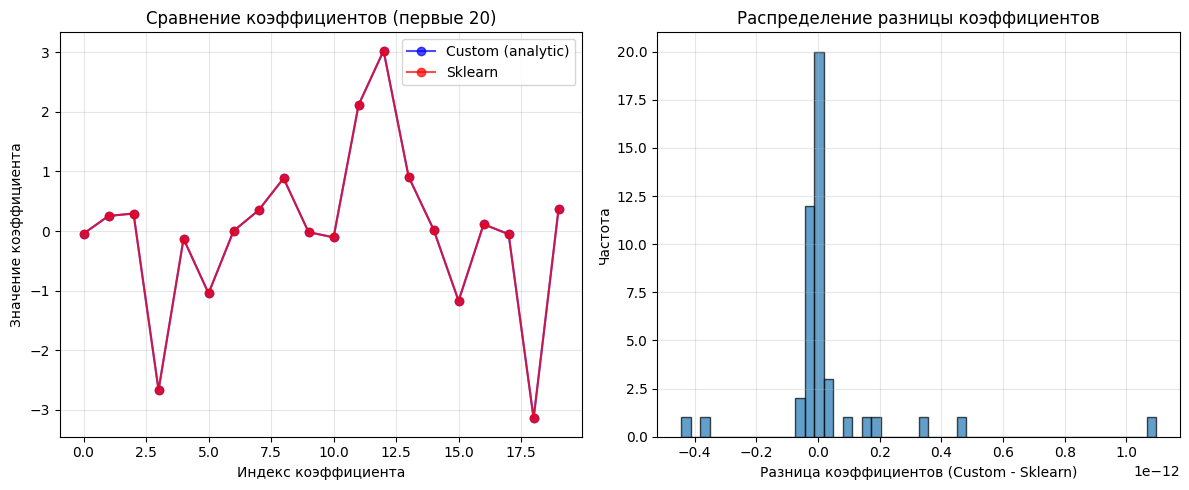

In [ ]:
print("\n" + "="*70)
print("11. ТЕСТИРОВАНИЕ ЛИНЕЙНОЙ РЕГРЕССИИ")
print("="*70)

print("Используем z-score нормализованные данные.")

print("\n1. Аналитическое решение (нормальное уравнение):")
lr_analytic = CustomLinearRegression(fit_intercept=True)
lr_analytic.fit_analytical(X_train_z, y_train_np)
y_pred_analytic = lr_analytic.predict(X_val_z)

print(f"  Количество коэффициентов: {len(lr_analytic.coef_)}")
print(f"  Intercept: {lr_analytic.intercept_:.4f}")
print(f"  Первые 5 коэффициентов: {lr_analytic.coef_[:5].round(4)}")

print("\n2. Градиентный спуск:")
lr_gd = CustomLinearRegression(fit_intercept=True)
lr_gd, gd_loss = lr_gd.fit_gradient_descent(
    X_train_z, y_train_np,
    learning_rate=0.01,
    n_iters=200
)
y_pred_gd = lr_gd.predict(X_val_z)

print("\n3. Стохастический градиентный спуск:")
lr_sgd = CustomLinearRegression(fit_intercept=True)
lr_sgd, sgd_loss = lr_sgd.fit_stochastic_gd(
    X_train_z, y_train_np,
    learning_rate=0.01,
    n_epochs=10,
    batch_size=64
)
y_pred_sgd = lr_sgd.predict(X_val_z)

print("\n4. Sklearn LinearRegression:")
from sklearn.linear_model import LinearRegression
lr_sklearn = LinearRegression()
lr_sklearn.fit(X_train_z, y_train_np)
y_pred_sklearn = lr_sklearn.predict(X_val_z)

print(f"  Sklearn intercept: {lr_sklearn.intercept_:.4f}")
print(f"  Sklearn coef shape: {lr_sklearn.coef_.shape}")
print(f"  Первые 5 коэффициентов sklearn: {lr_sklearn.coef_[:5].round(4)}")

print("\n5. Сравнение коэффициентов (аналитическое vs sklearn):")
print(f"  Intercept разница: {abs(lr_analytic.intercept_ - lr_sklearn.intercept_):.6f}")

coef_diff = np.abs(lr_analytic.coef_[:10] - lr_sklearn.coef_[:10])
print(f"  Средняя разница первых 10 коэффициентов: {np.mean(coef_diff):.6f}")
print(f"  Максимальная разница первых 10 коэффициентов: {np.max(coef_diff):.6f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(lr_analytic.coef_[:20], 'bo-', label='Custom (analytic)', alpha=0.7)
plt.plot(lr_sklearn.coef_[:20], 'ro-', label='Sklearn', alpha=0.7)
plt.xlabel('Индекс коэффициента')
plt.ylabel('Значение коэффициента')
plt.title('Сравнение коэффициентов (первые 20)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
diff_coefs = lr_analytic.coef_ - lr_sklearn.coef_
plt.hist(diff_coefs, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Разница коэффициентов (Custom - Sklearn)')
plt.ylabel('Частота')
plt.title('Распределение разницы коэффициентов')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

__12. Релизация метрик__


12. РЕАЛИЗАЦИЯ МЕТРИК РЕГРЕССИИ
Класс RegressionMetrics успешно создан.

СРАВНЕНИЕ МЕТРИК ДЛЯ РАЗНЫХ МЕТОДОВ ОБУЧЕНИЯ:
------------------------------------------------------------

Аналитическое решение:
  MSE            :    53.7703
  RMSE           :     7.3328
  MAE            :     5.8867
  R2             :     0.8202
  MAPE           :    14.0320 %
  Adjusted R2    :     0.8192

Градиентный спуск:
  MSE            :    94.3977
  RMSE           :     9.7158
  MAE            :     8.1430
  R2             :     0.6843
  MAPE           :    17.7231 %
  Adjusted R2    :     0.6826

Стохастический GD:
  MSE            :    54.0449
  RMSE           :     7.3515
  MAE            :     5.8936
  R2             :     0.8193
  MAPE           :    14.0446 %
  Adjusted R2    :     0.8183

Sklearn:
  MSE            :    53.7703
  RMSE           :     7.3328
  MAE            :     5.8867
  R2             :     0.8202
  MAPE           :    14.0320 %
  Adjusted R2    :     0.8192


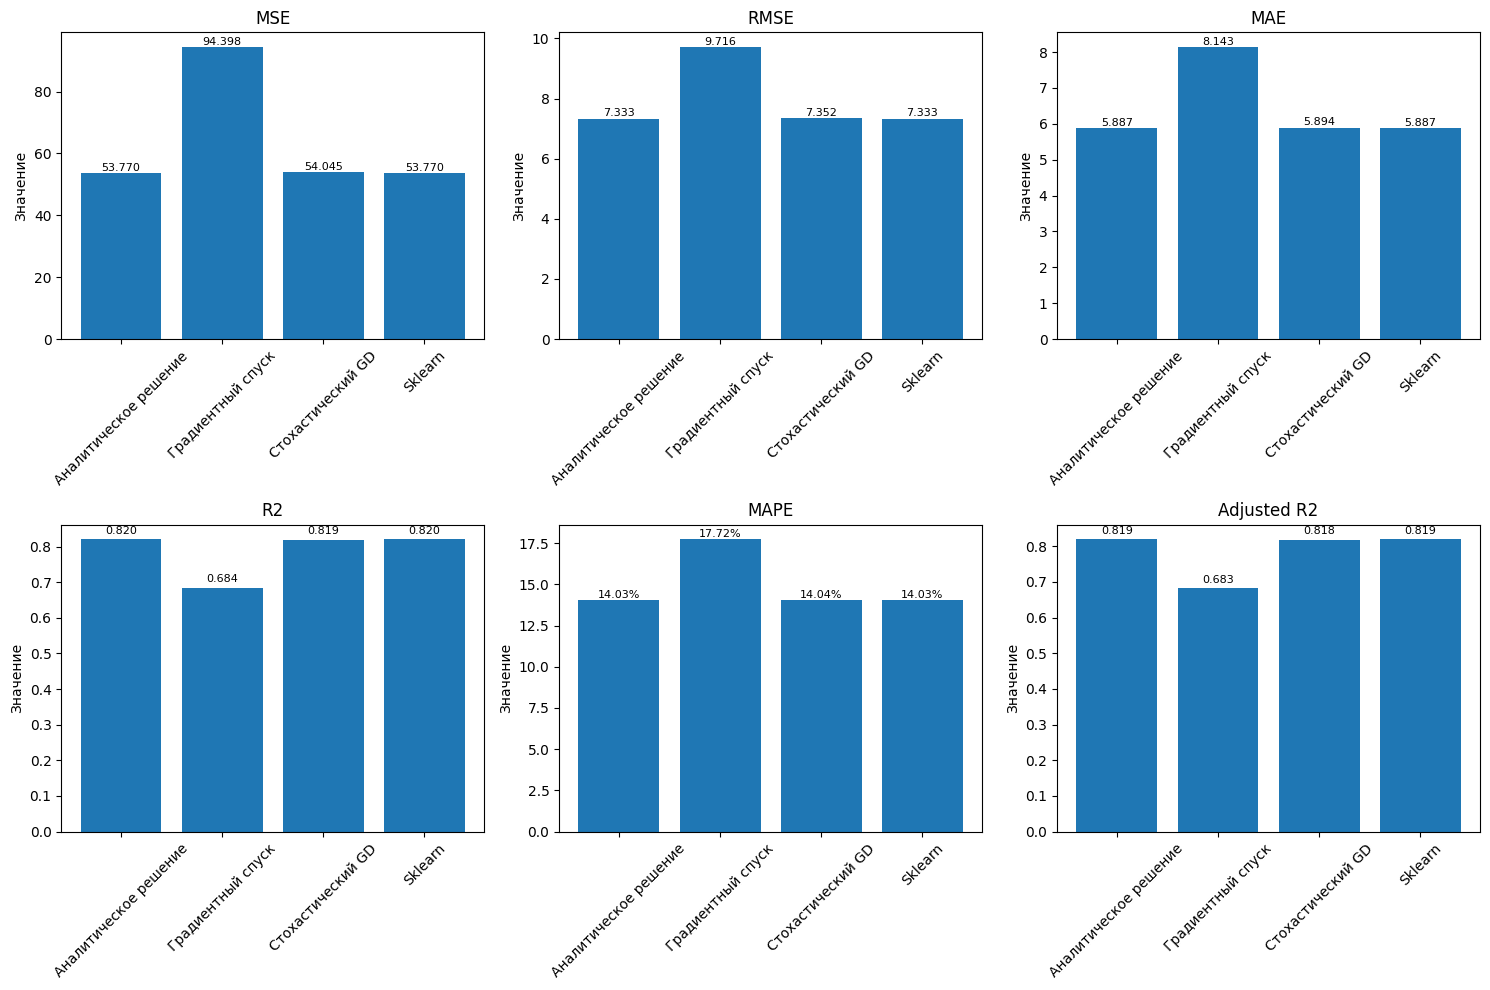

In [ ]:
print("\n" + "="*70)
print("12. РЕАЛИЗАЦИЯ МЕТРИК РЕГРЕССИИ")
print("="*70)

class RegressionMetrics:
    @staticmethod
    def mse(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    @staticmethod
    def mae(y_true, y_pred):
        return np.mean(np.abs(y_true - y_pred))

    @staticmethod
    def r2_score(y_true, y_pred):
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        return 1 - (ss_res / ss_tot) if ss_tot != 0 else 0

    @staticmethod
    def mape(y_true, y_pred, epsilon=1e-10):
        y_true_nonzero = np.where(np.abs(y_true) < epsilon, epsilon, y_true)
        return np.mean(np.abs((y_true - y_pred) / y_true_nonzero)) * 100

    @staticmethod
    def rmse(y_true, y_pred):
        return np.sqrt(RegressionMetrics.mse(y_true, y_pred))

    @staticmethod
    def adjusted_r2(y_true, y_pred, n_features, n_samples):
        r2 = RegressionMetrics.r2_score(y_true, y_pred)
        if n_samples - n_features - 1 <= 0:
            return r2
        return 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)

print("Класс RegressionMetrics успешно создан.")

print("\nСРАВНЕНИЕ МЕТРИК ДЛЯ РАЗНЫХ МЕТОДОВ ОБУЧЕНИЯ:")
print("-" * 60)

def evaluate_model(y_true, y_pred, model_name, n_features=None, n_samples=None):
    mse = RegressionMetrics.mse(y_true, y_pred)
    mae = RegressionMetrics.mae(y_true, y_pred)
    r2 = RegressionMetrics.r2_score(y_true, y_pred)
    mape_val = RegressionMetrics.mape(y_true, y_pred)
    rmse = RegressionMetrics.rmse(y_true, y_pred)

    metrics = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'MAPE': mape_val
    }

    if n_features and n_samples:
        adj_r2 = RegressionMetrics.adjusted_r2(y_true, y_pred, n_features, n_samples)
        metrics['Adjusted R2'] = adj_r2

    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        if metric_name == 'MAPE':
            print(f"  {metric_name:15}: {value:10.4f} %")
        else:
            print(f"  {metric_name:15}: {value:10.4f}")

    return metrics

models = {
    'Аналитическое решение': y_pred_analytic,
    'Градиентный спуск': y_pred_gd,
    'Стохастический GD': y_pred_sgd,
    'Sklearn': y_pred_sklearn
}

n_features = X_train_z.shape[1]
n_samples = X_train_z.shape[0]

all_metrics = {}
for model_name, y_pred in models.items():
    metrics = evaluate_model(y_val_np, y_pred, model_name, n_features, n_samples)
    all_metrics[model_name] = metrics

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

metric_names = ['MSE', 'RMSE', 'MAE', 'R2', 'MAPE', 'Adjusted R2']
for i, metric in enumerate(metric_names):
    if i < len(axes):
        model_names = list(all_metrics.keys())
        values = []
        for model in model_names:
            if metric in all_metrics[model]:
                values.append(all_metrics[model][metric])

        bars = axes[i].bar(model_names, values)
        axes[i].set_title(metric)
        axes[i].set_ylabel('Значение')
        axes[i].tick_params(axis='x', rotation=45)

        for bar, val in zip(bars, values):
            height = bar.get_height()
            if metric == 'MAPE':
                axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                           f'{val:.2f}%', ha='center', va='bottom', fontsize=8)
            else:
                axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                           f'{val:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

__13. Реализация кросс-валидации__


14. ИСПРАВЛЕННАЯ ВЕРСИЯ КРОСС-ВАЛИДАЦИИ
Исправленный класс CrossValidationFixed успешно создан.

ТЕСТИРОВАНИЕ ИСПРАВЛЕННОЙ КРОСС-ВАЛИДАЦИИ
--------------------------------------------------

1. K-Fold кросс-валидация (k=5):
Выполняется 5-fold кросс-валидация на 8217 образцах...
  Fold 1: MSE = 52.4477, R² = 0.8272
  Fold 2: MSE = 54.0088, R² = 0.8150
  Fold 3: MSE = 54.8188, R² = 0.8127
  Fold 4: MSE = 51.5657, R² = 0.8258
  Fold 5: MSE = 52.7160, R² = 0.8236

Результаты K-Fold кросс-валидации (k=5):
  MSE: среднее = 53.1114, std = 1.1581
  RMSE: среднее = 7.2873, std = 0.0794
  MAE: среднее = 5.8182, std = 0.1192
  R2: среднее = 0.8208, std = 0.0059
  MAPE: среднее = 13.6409, std = 0.2701

2. Leave-One-Out кросс-валидация (на 50 образцах):
Выполняется Leave-One-Out кросс-валидация на 50 образцах...
  Обработано 20/50 образцов
  Обработано 40/50 образцов

Результаты Leave-One-Out кросс-валидации (на 50 образцах):
  MSE: среднее = 555.6218, std = 1569.2568
  RMSE: среднее = 15.7788, st

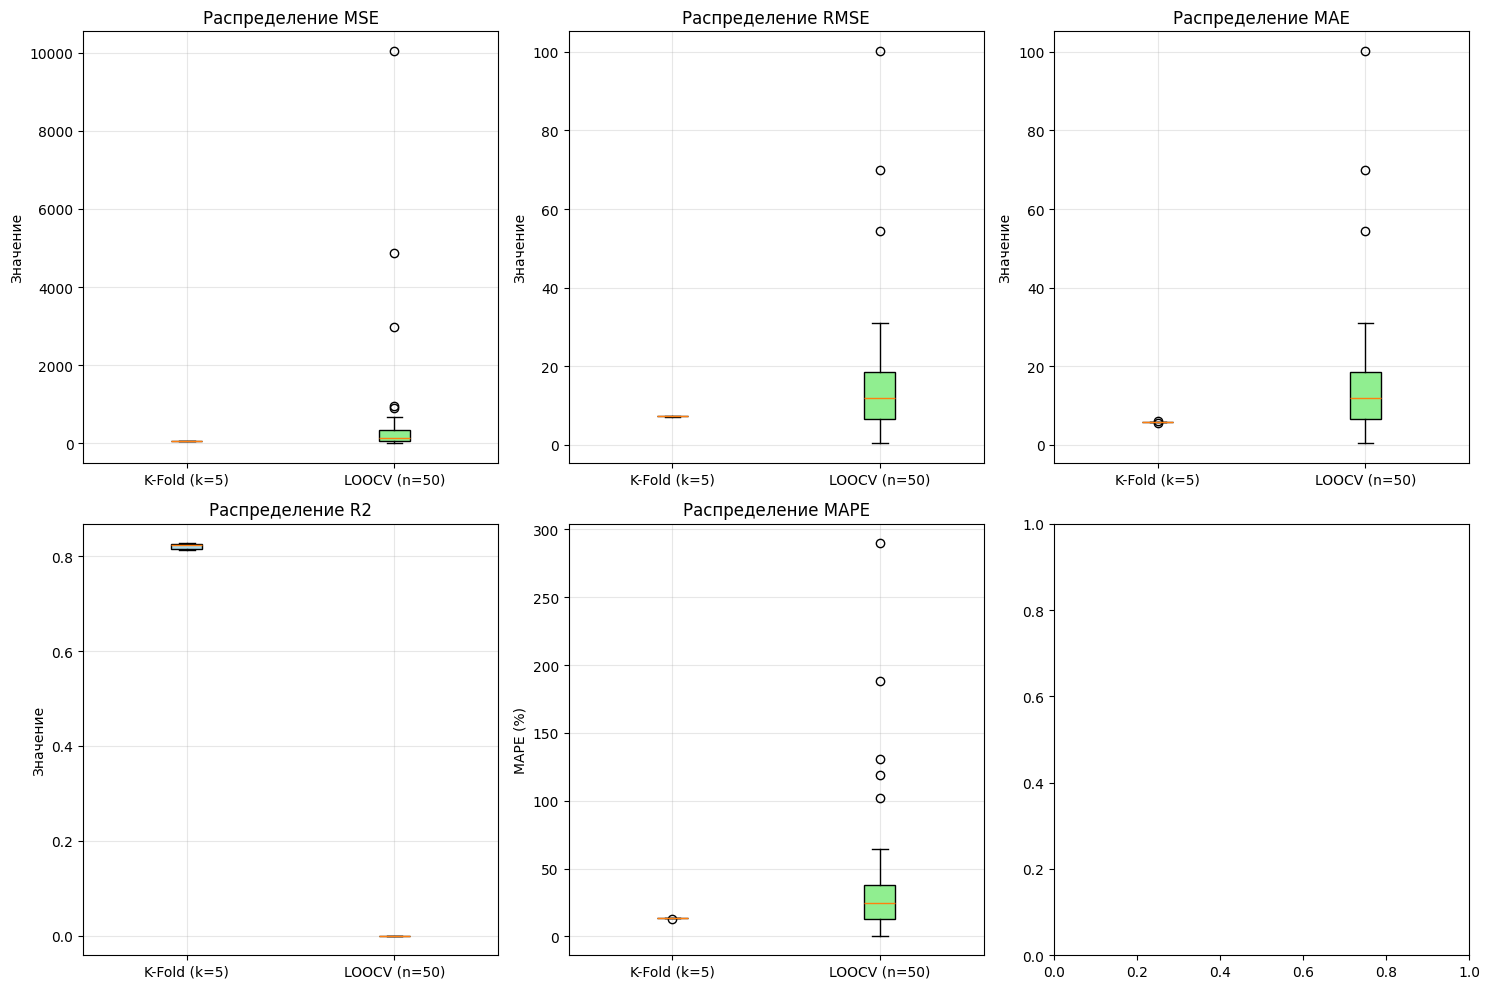


СРАВНЕНИЕ С РЕЗУЛЬТАТАМИ НА ВАЛИДАЦИИ:
--------------------------------------------------
На валидации (аналитическое решение):
  MSE: 53.7703
  R²: 0.8202

K-Fold кросс-валидация (среднее):
  MSE: 53.1114
  R²: 0.8208


In [22]:
# 14. Исправленная версия кросс-валидации с обработкой данных
print("\n" + "="*70)
print("14. ИСПРАВЛЕННАЯ ВЕРСИЯ КРОСС-ВАЛИДАЦИИ")
print("="*70)

class CrossValidationFixed:
    """Исправленный класс для кросс-валидации с обработкой данных"""
    
    @staticmethod
    def clean_and_convert_to_float(X, y):
        """Очистка и преобразование данных в float"""
        # Преобразуем в DataFrame/Series для удобства
        X_df = pd.DataFrame(X) if not isinstance(X, pd.DataFrame) else X.copy()
        y_series = pd.Series(y) if not isinstance(y, pd.Series) else y.copy()
        
        # Преобразуем все колонки X в числовой формат
        for col in X_df.columns:
            X_df[col] = pd.to_numeric(X_df[col], errors='coerce')
        
        # Преобразуем y в числовой формат
        y_series = pd.to_numeric(y_series, errors='coerce')
        
        # Заполняем пропуски медианой
        X_df = X_df.fillna(X_df.median())
        y_series = y_series.fillna(y_series.median())
        
        # Проверяем на бесконечные значения
        X_df = X_df.replace([np.inf, -np.inf], np.nan)
        y_series = y_series.replace([np.inf, -np.inf], np.nan)
        
        # Снова заполняем пропуски
        X_df = X_df.fillna(X_df.median())
        y_series = y_series.fillna(y_series.median())
        
        return X_df.values.astype(np.float64), y_series.values.astype(np.float64)
    
    @staticmethod
    def k_fold_cv(model, X, y, k=5, shuffle=True, random_state=42, normalize='zscore'):
        """K-fold кросс-валидация с очисткой данных"""
        # Очищаем и преобразуем данные
        X_clean, y_clean = CrossValidationFixed.clean_and_convert_to_float(X, y)
        
        n_samples = len(X_clean)
        
        if shuffle:
            np.random.seed(random_state)
            indices = np.random.permutation(n_samples)
            X_clean = X_clean[indices]
            y_clean = y_clean[indices]
        
        fold_size = n_samples // k
        scores = {'MSE': [], 'RMSE': [], 'MAE': [], 'R2': [], 'MAPE': []}
        
        print(f"Выполняется {k}-fold кросс-валидация на {n_samples} образцах...")
        
        for i in range(k):
            # Определяем индексы для валидации и обучения
            val_start = i * fold_size
            val_end = val_start + fold_size if i < k-1 else n_samples
            
            val_indices = slice(val_start, val_end)
            train_indices = np.concatenate([
                np.arange(0, val_start),
                np.arange(val_end, n_samples)
            ])
            
            # Разделение данных
            X_train_cv = X_clean[train_indices]
            y_train_cv = y_clean[train_indices]
            X_val_cv = X_clean[val_indices]
            y_val_cv = y_clean[val_indices]
            
            # Нормализация
            if normalize == 'zscore':
                mean_train = np.mean(X_train_cv, axis=0)
                std_train = np.std(X_train_cv, axis=0)
                std_train[std_train == 0] = 1
                
                X_train_cv_norm = (X_train_cv - mean_train) / std_train
                X_val_cv_norm = (X_val_cv - mean_train) / std_train
            elif normalize == 'minmax':
                min_train = np.min(X_train_cv, axis=0)
                max_train = np.max(X_train_cv, axis=0)
                range_train = max_train - min_train
                range_train[range_train == 0] = 1
                
                X_train_cv_norm = (X_train_cv - min_train) / range_train
                X_val_cv_norm = (X_val_cv - min_train) / range_train
            else:
                X_train_cv_norm = X_train_cv
                X_val_cv_norm = X_val_cv
            
            # Обучение модели
            if isinstance(model, CustomLinearRegression):
                model.fit_analytical(X_train_cv_norm, y_train_cv)
            else:
                model.fit(X_train_cv_norm, y_train_cv)
            
            # Предсказание и оценка
            y_pred = model.predict(X_val_cv_norm)
            
            # Вычисление метрик
            mse = RegressionMetrics.mse(y_val_cv, y_pred)
            rmse = RegressionMetrics.rmse(y_val_cv, y_pred)
            mae = RegressionMetrics.mae(y_val_cv, y_pred)
            r2 = RegressionMetrics.r2_score(y_val_cv, y_pred)
            mape = RegressionMetrics.mape(y_val_cv, y_pred)
            
            scores['MSE'].append(mse)
            scores['RMSE'].append(rmse)
            scores['MAE'].append(mae)
            scores['R2'].append(r2)
            scores['MAPE'].append(mape)
            
            print(f"  Fold {i+1}: MSE = {mse:.4f}, R² = {r2:.4f}")
        
        # Преобразуем в numpy массивы
        for key in scores:
            scores[key] = np.array(scores[key])
        
        return scores
    
    @staticmethod
    def leave_one_out_cv(model, X, y, max_samples=100, normalize='zscore', random_state=42):
        """Leave-One-Out кросс-валидация"""
        # Очищаем и преобразуем данные
        X_clean, y_clean = CrossValidationFixed.clean_and_convert_to_float(X, y)
        
        n_samples = min(len(X_clean), max_samples)
        
        # Перемешиваем выборку
        np.random.seed(random_state)
        indices = np.random.permutation(len(X_clean))[:n_samples]
        X_sample = X_clean[indices]
        y_sample = y_clean[indices]
        
        scores = {'MSE': [], 'RMSE': [], 'MAE': [], 'R2': [], 'MAPE': []}
        
        print(f"Выполняется Leave-One-Out кросс-валидация на {n_samples} образцах...")
        
        for i in range(n_samples):
            # Один образец для валидации, остальные для обучения
            X_train_cv = np.delete(X_sample, i, axis=0)
            y_train_cv = np.delete(y_sample, i, axis=0)
            X_val_cv = X_sample[i:i+1]
            y_val_cv = y_sample[i:i+1]
            
            # Нормализация
            if normalize == 'zscore':
                mean_train = np.mean(X_train_cv, axis=0)
                std_train = np.std(X_train_cv, axis=0)
                std_train[std_train == 0] = 1
                
                X_train_cv_norm = (X_train_cv - mean_train) / std_train
                X_val_cv_norm = (X_val_cv - mean_train) / std_train
            elif normalize == 'minmax':
                min_train = np.min(X_train_cv, axis=0)
                max_train = np.max(X_train_cv, axis=0)
                range_train = max_train - min_train
                range_train[range_train == 0] = 1
                
                X_train_cv_norm = (X_train_cv - min_train) / range_train
                X_val_cv_norm = (X_val_cv - min_train) / range_train
            else:
                X_train_cv_norm = X_train_cv
                X_val_cv_norm = X_val_cv
            
            # Обучение модели
            if isinstance(model, CustomLinearRegression):
                model.fit_analytical(X_train_cv_norm, y_train_cv)
            else:
                model.fit(X_train_cv_norm, y_train_cv)
            
            # Предсказание и оценка
            y_pred = model.predict(X_val_cv_norm)
            
            # Вычисление метрик
            mse = RegressionMetrics.mse(y_val_cv, y_pred)
            rmse = RegressionMetrics.rmse(y_val_cv, y_pred)
            mae = RegressionMetrics.mae(y_val_cv, y_pred)
            r2 = RegressionMetrics.r2_score(y_val_cv, y_pred)
            mape = RegressionMetrics.mape(y_val_cv, y_pred)
            
            scores['MSE'].append(mse)
            scores['RMSE'].append(rmse)
            scores['MAE'].append(mae)
            scores['R2'].append(r2)
            scores['MAPE'].append(mape)
            
            if (i+1) % 20 == 0:
                print(f"  Обработано {i+1}/{n_samples} образцов")
        
        # Преобразуем в numpy массивы
        for key in scores:
            scores[key] = np.array(scores[key])
        
        return scores

print("Исправленный класс CrossValidationFixed успешно создан.")

# Тестирование исправленной кросс-валидации
print("\nТЕСТИРОВАНИЕ ИСПРАВЛЕННОЙ КРОСС-ВАЛИДАЦИИ")
print("-" * 50)

# Используем нашу модель
model_cv = CustomLinearRegression(fit_intercept=True)

# K-fold кросс-валидация
print("\n1. K-Fold кросс-валидация (k=5):")
kfold_scores = CrossValidationFixed.k_fold_cv(model_cv, X_train_np, y_train_np, k=5, normalize='zscore')

# Вывод результатов
print(f"\nРезультаты K-Fold кросс-валидации (k=5):")
for metric, values in kfold_scores.items():
    print(f"  {metric}: среднее = {values.mean():.4f}, std = {values.std():.4f}")

# Leave-One-Out кросс-валидация
print("\n2. Leave-One-Out кросс-валидация (на 50 образцах):")
loocv_scores = CrossValidationFixed.leave_one_out_cv(
    model_cv, X_train_np, y_train_np, 
    max_samples=50, normalize='zscore'
)

print(f"\nРезультаты Leave-One-Out кросс-валидации (на 50 образцах):")
for metric, values in loocv_scores.items():
    print(f"  {metric}: среднее = {values.mean():.4f}, std = {values.std():.4f}")

# Визуализация результатов
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

metric_names = ['MSE', 'RMSE', 'MAE', 'R2', 'MAPE']
for i, metric in enumerate(metric_names):
    if i < len(axes):
        # Данные для K-Fold
        kfold_values = kfold_scores[metric]
        
        # Данные для LOOCV (только если есть)
        loocv_values = loocv_scores[metric] if metric in loocv_scores else []
        
        # Создаем boxplot
        data_to_plot = [kfold_values]
        labels = ['K-Fold (k=5)']
        
        if len(loocv_values) > 0:
            data_to_plot.append(loocv_values)
            labels.append('LOOCV (n=50)')
        
        bp = axes[i].boxplot(data_to_plot, labels=labels, patch_artist=True)
        
        # Раскрашиваем boxplot
        colors = ['lightblue', 'lightgreen']
        for patch, color in zip(bp['boxes'], colors[:len(data_to_plot)]):
            patch.set_facecolor(color)
        
        axes[i].set_title(f'Распределение {metric}')
        axes[i].set_ylabel('Значение')
        
        if metric == 'MAPE':
            axes[i].set_ylabel('MAPE (%)')
        
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Сравнение с результатами на валидации
print("\nСРАВНЕНИЕ С РЕЗУЛЬТАТАМИ НА ВАЛИДАЦИИ:")
print("-" * 50)
print(f"На валидации (аналитическое решение):")
print(f"  MSE: {RegressionMetrics.mse(y_val_np, y_pred_analytic):.4f}")
print(f"  R²: {RegressionMetrics.r2_score(y_val_np, y_pred_analytic):.4f}")

print(f"\nK-Fold кросс-валидация (среднее):")
print(f"  MSE: {kfold_scores['MSE'].mean():.4f}")
print(f"  R²: {kfold_scores['R2'].mean():.4f}")

__14. Регрессия с регуляризацией__

In [23]:
# 15. Реализация регуляризованной линейной регрессии
print("\n" + "="*70)
print("15. РЕАЛИЗАЦИЯ РЕГУЛЯРИЗОВАННОЙ ЛИНЕЙНОЙ РЕГРЕССИИ")
print("="*70)

class RegularizedLinearRegression(CustomLinearRegression):
    """Линейная регрессия с регуляризацией"""
    
    def __init__(self, fit_intercept=True, regularization=None, alpha=1.0, 
                 l1_ratio=0.5, p=2, random_state=None):
        """
        Параметры:
        -----------
        fit_intercept : bool, добавлять ли intercept
        regularization : str, тип регуляризации ('l1', 'l2', 'elasticnet', 'lp', None)
        alpha : float, сила регуляризации
        l1_ratio : float, для elasticnet (0 - только L2, 1 - только L1)
        p : float, для Lp регуляризации
        random_state : int, для воспроизводимости
        """
        super().__init__(fit_intercept)
        self.regularization = regularization
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.p = p
        self.random_state = random_state
        
    def _regularization_term(self, theta):
        """Вычисляет член регуляризации"""
        if self.regularization is None or self.alpha == 0:
            return 0
        
        # Убираем intercept из регуляризации
        if self.fit_intercept:
            theta_reg = theta[1:]
        else:
            theta_reg = theta
        
        if self.regularization == 'l1':
            # L1 регуляризация (Lasso)
            return self.alpha * np.sum(np.abs(theta_reg))
        elif self.regularization == 'l2':
            # L2 регуляризация (Ridge)
            return self.alpha * np.sum(theta_reg ** 2)
        elif self.regularization == 'elasticnet':
            # ElasticNet (комбинация L1 и L2)
            l1_term = np.sum(np.abs(theta_reg))
            l2_term = np.sum(theta_reg ** 2)
            return self.alpha * (self.l1_ratio * l1_term + (1 - self.l1_ratio) * l2_term)
        elif self.regularization == 'lp':
            # Lp регуляризация
            return self.alpha * np.sum(np.abs(theta_reg) ** self.p)
        else:
            return 0
    
    def _regularization_gradient(self, theta):
        """Вычисляет градиент регуляризации"""
        if self.regularization is None or self.alpha == 0:
            return 0
        
        # Убираем intercept из регуляризации
        if self.fit_intercept:
            theta_reg = theta[1:]
            grad_reg = np.zeros_like(theta)
        else:
            theta_reg = theta
            grad_reg = np.zeros_like(theta)
        
        if self.regularization == 'l1':
            # Градиент L1 регуляризации (субградиент)
            grad = self.alpha * np.sign(theta_reg)
        elif self.regularization == 'l2':
            # Градиент L2 регуляризации
            grad = 2 * self.alpha * theta_reg
        elif self.regularization == 'elasticnet':
            # Градиент ElasticNet
            grad_l1 = self.alpha * self.l1_ratio * np.sign(theta_reg)
            grad_l2 = 2 * self.alpha * (1 - self.l1_ratio) * theta_reg
            grad = grad_l1 + grad_l2
        elif self.regularization == 'lp':
            # Градиент Lp регуляризации
            grad = self.alpha * self.p * np.sign(theta_reg) * np.abs(theta_reg) ** (self.p - 1)
        else:
            grad = np.zeros_like(theta_reg)
        
        if self.fit_intercept:
            grad_reg[1:] = grad
        else:
            grad_reg = grad
            
        return grad_reg
    
    def fit_analytical(self, X, y):
        """Аналитическое решение с регуляризацией (только для L2)"""
        if self.regularization not in [None, 'l2']:
            print(f"  Внимание: аналитическое решение доступно только для L2 регуляризации")
            print(f"  Используется градиентный спуск")
            return self.fit_gradient_descent(X, y)
        
        X_with_intercept = self._add_intercept(X)
        n_features = X_with_intercept.shape[1]
        
        try:
            # Для L2: θ = (XᵀX + αI)⁻¹ Xᵀy
            # Добавляем регуляризацию к матрице (кроме intercept)
            identity = np.eye(n_features)
            if self.fit_intercept:
                identity[0, 0] = 0  # Не регуляризуем intercept
            
            theta = np.linalg.pinv(
                X_with_intercept.T @ X_with_intercept + self.alpha * identity
            ) @ X_with_intercept.T @ y
        except np.linalg.LinAlgError as e:
            print(f"  LinAlgError при аналитическом решении: {e}")
            # Используем SVD как запасной вариант
            U, s, Vt = np.linalg.svd(X_with_intercept, full_matrices=False)
            # Регуляризация малых сингулярных значений
            s_inv = s / (s**2 + self.alpha)
            theta = Vt.T @ np.diag(s_inv) @ U.T @ y
        
        if self.fit_intercept:
            self.intercept_ = theta[0]
            self.coef_ = theta[1:]
        else:
            self.intercept_ = 0.0
            self.coef_ = theta
        
        return self
    
    def fit_gradient_descent(self, X, y, learning_rate=0.01, n_iters=1000, tol=1e-6):
        """Градиентный спуск с регуляризацией"""
        if self.random_state is not None:
            np.random.seed(self.random_state)
            
        n_samples, n_features = X.shape
        X_with_intercept = self._add_intercept(X)
        
        # Инициализация параметров
        if self.fit_intercept:
            theta = np.zeros(n_features + 1)
        else:
            theta = np.zeros(n_features)
            X_with_intercept = X
        
        y = y.reshape(-1, 1)
        theta = theta.reshape(-1, 1)
        
        # История функции потерь
        loss_history = []
        
        for i in range(n_iters):
            # Предсказания
            y_pred = X_with_intercept @ theta
            
            # Вычисление ошибки
            error = y_pred - y
            
            # Вычисление градиента MSE
            mse_gradient = (1/n_samples) * X_with_intercept.T @ error
            
            # Добавляем градиент регуляризации
            reg_gradient = self._regularization_gradient(theta)
            
            # Общий градиент
            gradient = mse_gradient + reg_gradient.reshape(-1, 1)
            
            # Обновление параметров
            theta_new = theta - learning_rate * gradient
            
            # Проверка сходимости
            if np.linalg.norm(theta_new - theta) < tol:
                print(f"  Градиентный спуск сошелся на итерации {i+1}")
                break
            
            theta = theta_new
            
            # Вычисление общей функции потерь (MSE + регуляризация)
            mse = np.mean(error ** 2)
            reg_term = self._regularization_term(theta)
            total_loss = mse + reg_term / n_samples
            loss_history.append(total_loss)
            
            if i % 100 == 0 and i > 0:
                print(f"  Итерация {i}, Loss: {total_loss:.4f}, MSE: {mse:.4f}")
        
        if self.fit_intercept:
            self.intercept_ = theta[0][0]
            self.coef_ = theta[1:].flatten()
        else:
            self.intercept_ = 0.0
            self.coef_ = theta.flatten()
        
        return self, loss_history
    
    def fit_stochastic_gd(self, X, y, learning_rate=0.01, n_epochs=50, batch_size=32, tol=1e-6):
        """Стохастический градиентный спуск с регуляризацией"""
        if self.random_state is not None:
            np.random.seed(self.random_state)
            
        n_samples, n_features = X.shape
        X_with_intercept = self._add_intercept(X)
        
        # Инициализация параметров
        if self.fit_intercept:
            theta = np.zeros(n_features + 1)
        else:
            theta = np.zeros(n_features)
            X_with_intercept = X
        
        y = y.reshape(-1, 1)
        theta = theta.reshape(-1, 1)
        
        # История функции потерь
        loss_history = []
        
        for epoch in range(n_epochs):
            # Перемешиваем данные
            indices = np.random.permutation(n_samples)
            X_shuffled = X_with_intercept[indices]
            y_shuffled = y[indices]
            
            epoch_loss = 0
            batch_count = 0
            
            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]
                
                # Предсказания
                y_pred = X_batch @ theta
                
                # Вычисление ошибки
                error = y_pred - y_batch
                
                # Вычисление градиента MSE
                mse_gradient = (1/len(X_batch)) * X_batch.T @ error
                
                # Добавляем градиент регуляризации
                reg_gradient = self._regularization_gradient(theta)
                
                # Общий градиент
                gradient = mse_gradient + reg_gradient.reshape(-1, 1)
                
                # Обновление параметров
                theta_new = theta - learning_rate * gradient
                
                theta = theta_new
                
                # Вычисление потерь для батча
                mse_batch = np.mean(error ** 2)
                reg_term = self._regularization_term(theta)
                batch_loss = mse_batch + reg_term / len(X_batch)
                epoch_loss += batch_loss
                batch_count += 1
            
            avg_loss = epoch_loss / batch_count
            loss_history.append(avg_loss)
            
            if epoch % 10 == 0:
                print(f"  Эпоха {epoch}, Loss: {avg_loss:.4f}")
            
            # Проверка сходимости
            if len(loss_history) > 1 and abs(loss_history[-1] - loss_history[-2]) < tol:
                print(f"  Стохастический GD сошелся на эпохе {epoch+1}")
                break
        
        if self.fit_intercept:
            self.intercept_ = theta[0][0]
            self.coef_ = theta[1:].flatten()
        else:
            self.intercept_ = 0.0
            self.coef_ = theta.flatten()
        
        return self, loss_history

print("Класс RegularizedLinearRegression успешно создан.")


15. РЕАЛИЗАЦИЯ РЕГУЛЯРИЗОВАННОЙ ЛИНЕЙНОЙ РЕГРЕССИИ
Класс RegularizedLinearRegression успешно создан.



16. ТЕСТИРОВАНИЕ РЕГУЛЯРИЗОВАННОЙ ЛИНЕЙНОЙ РЕГРЕССИИ
Создание моделей с разными типами регуляризации:

Обучение моделей:

Без регуляризации:
  MSE: 53.7703, R²: 0.8202

L1 (Lasso):
  Итерация 100, Loss: 381.6348, MSE: 381.6325
  MSE: 103.0508, R²: 0.6554

L2 (Ridge):
  MSE: 53.7669, R²: 0.8202

ElasticNet:
  Итерация 100, Loss: 391.5525, MSE: 391.5495
  MSE: 113.3164, R²: 0.6211

Lp (p=1.5):
  Итерация 100, Loss: 387.6332, MSE: 387.6302
  MSE: 109.4493, R²: 0.6340

СРАВНЕНИЕ КОЭФФИЦИЕНТОВ МОДЕЛЕЙ:
------------------------------------------------------------

Статистика коэффициентов по моделям:
            Без регуляризации  L1 (Lasso)  L2 (Ridge)  ElasticNet  Lp (p=1.5)
Mean                   0.0032     -0.0821      0.0044     -0.0384     -0.0526
Std                    1.7363      1.0834      1.7293      0.8866      0.9368
Min                   -8.2999     -3.7749     -8.2653     -2.8389     -3.1407
Max                    4.9998      2.5023      4.9955      2.1756      2.2628
Non-zer

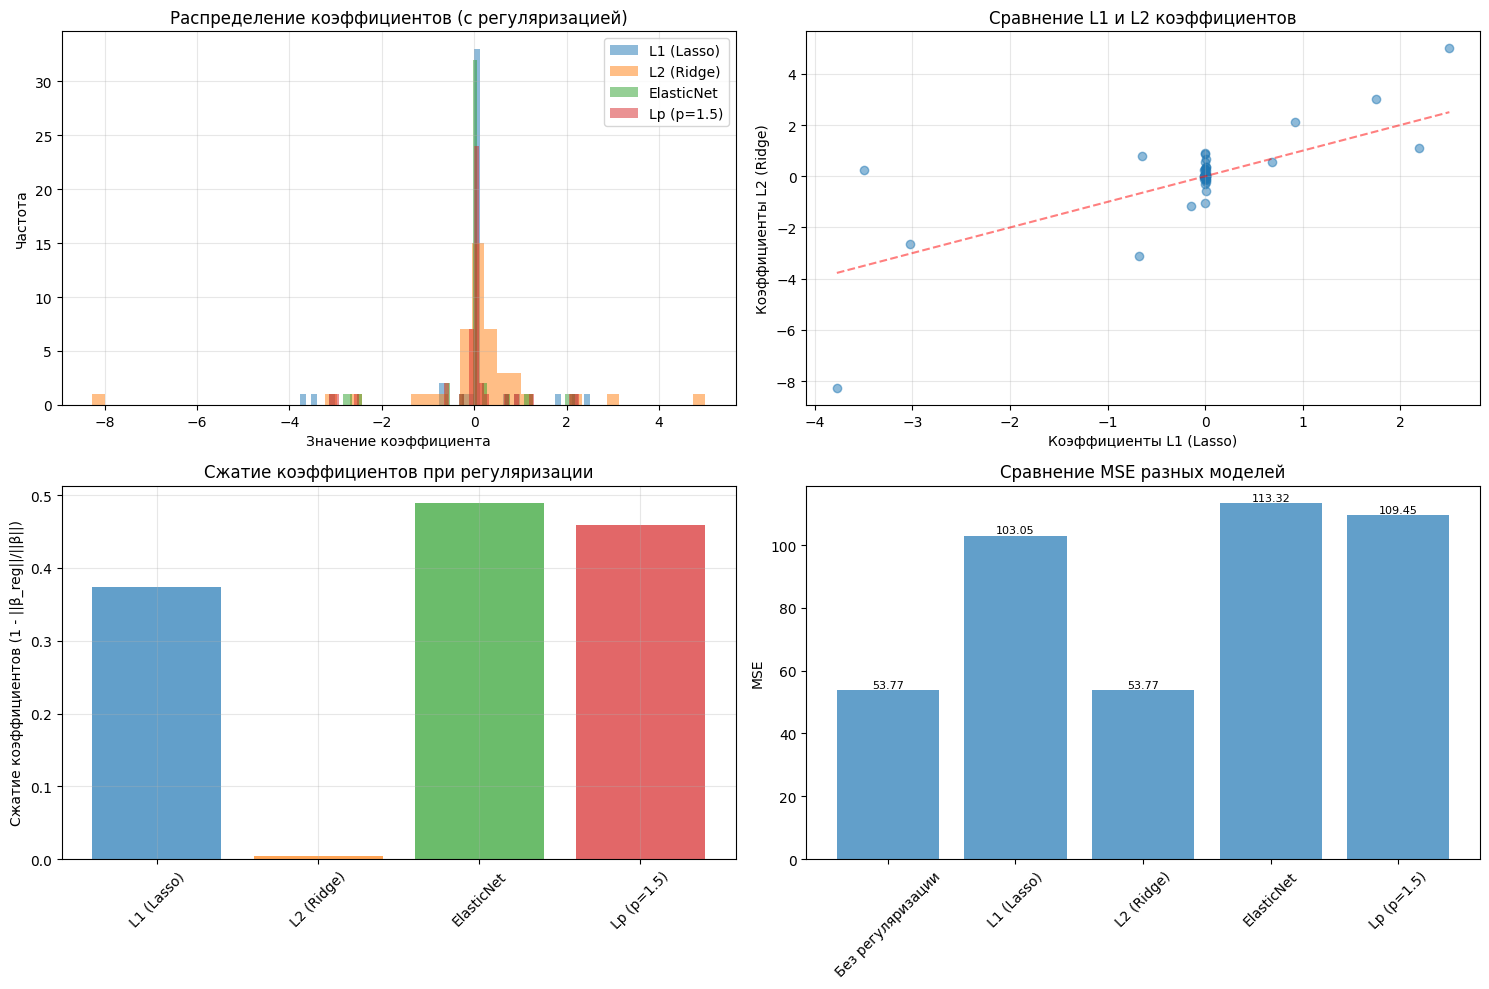


ПОДРОБНОЕ СРАВНЕНИЕ МЕТРИК ДЛЯ ВСЕХ МОДЕЛЕЙ:
--------------------------------------------------------------------------------
              Модель       MSE     RMSE     MAE      R²     MAPE  \
0  Без регуляризации   53.7703   7.3328  5.8867  0.8202  14.0320   
1         L1 (Lasso)  103.0508  10.1514  8.3932  0.6554  17.5350   
2         L2 (Ridge)   53.7669   7.3326  5.8865  0.8202  14.0314   
3         ElasticNet  113.3164  10.6450  8.4846  0.6211  16.6629   
4         Lp (p=1.5)  109.4493  10.4618  8.4354  0.6340  16.8161   

   Кол-во ненулевых коэф  
0                     45  
1                     45  
2                     45  
3                     45  
4                     45  

Лучшая модель по MSE: L2 (Ridge)


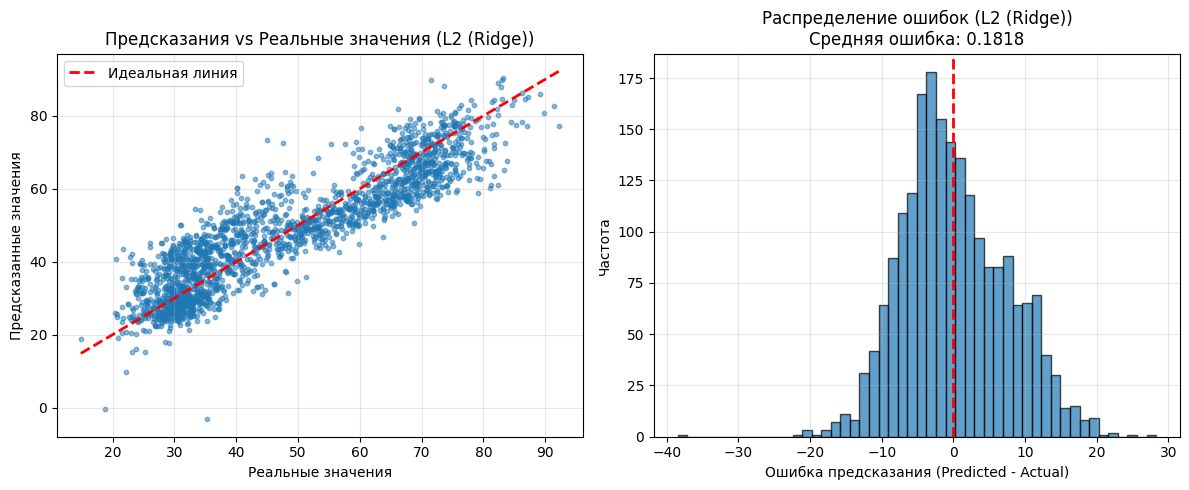

In [24]:
# 16. Тестирование регуляризованной линейной регрессии
print("\n" + "="*70)
print("16. ТЕСТИРОВАНИЕ РЕГУЛЯРИЗОВАННОЙ ЛИНЕЙНОЙ РЕГРЕССИИ")
print("="*70)

# Создаем модели с разными типами регуляризации
print("Создание моделей с разными типами регуляризации:")
regularization_types = [
    ('Без регуляризации', None),
    ('L1 (Lasso)', 'l1'),
    ('L2 (Ridge)', 'l2'),
    ('ElasticNet', 'elasticnet'),
    ('Lp (p=1.5)', 'lp')
]

# Параметры для тестирования
alpha = 1.0
l1_ratio = 0.5
p = 1.5

models_reg = {}
predictions_reg = {}

print("\nОбучение моделей:")
for name, reg_type in regularization_types:
    print(f"\n{name}:")
    
    if reg_type is None:
        # Без регуляризации
        model = RegularizedLinearRegression(
            fit_intercept=True,
            regularization=None,
            alpha=0.0,
            random_state=42
        )
    elif reg_type == 'lp':
        # Lp регуляризация
        model = RegularizedLinearRegression(
            fit_intercept=True,
            regularization='lp',
            alpha=alpha,
            p=p,
            random_state=42
        )
    else:
        # L1, L2, ElasticNet
        model = RegularizedLinearRegression(
            fit_intercept=True,
            regularization=reg_type,
            alpha=alpha,
            l1_ratio=l1_ratio if reg_type == 'elasticnet' else 0.5,
            random_state=42
        )
    
    # Обучаем модель (используем аналитическое решение для L2, градиентный спуск для остальных)
    if reg_type == 'l2' or reg_type is None:
        model.fit_analytical(X_train_z, y_train_np)
    else:
        model, loss_history = model.fit_gradient_descent(
            X_train_z, y_train_np,
            learning_rate=0.01,
            n_iters=200
        )
    
    # Делаем предсказания
    y_pred = model.predict(X_val_z)
    
    models_reg[name] = model
    predictions_reg[name] = y_pred
    
    # Вычисляем метрики
    mse = RegressionMetrics.mse(y_val_np, y_pred)
    r2 = RegressionMetrics.r2_score(y_val_np, y_pred)
    print(f"  MSE: {mse:.4f}, R²: {r2:.4f}")

# Сравним коэффициенты моделей
print("\nСРАВНЕНИЕ КОЭФФИЦИЕНТОВ МОДЕЛЕЙ:")
print("-" * 60)

# Создаем DataFrame для сравнения коэффициентов
coef_comparison = pd.DataFrame()
coef_comparison['Feature'] = [f'Feature_{i}' for i in range(len(models_reg['Без регуляризации'].coef_))]

# Добавляем коэффициенты для каждой модели
for name, model in models_reg.items():
    coef_comparison[name] = model.coef_

# Покажем статистику по коэффициентам
print("\nСтатистика коэффициентов по моделям:")
stats_df = pd.DataFrame()
for name in coef_comparison.columns[1:]:
    stats_df.loc['Mean', name] = coef_comparison[name].mean()
    stats_df.loc['Std', name] = coef_comparison[name].std()
    stats_df.loc['Min', name] = coef_comparison[name].min()
    stats_df.loc['Max', name] = coef_comparison[name].max()
    stats_df.loc['Non-zero %', name] = (coef_comparison[name] != 0).sum() / len(coef_comparison) * 100

print(stats_df.round(4))

# Визуализируем коэффициенты
plt.figure(figsize=(15, 10))

# 1. Распределение коэффициентов
plt.subplot(2, 2, 1)
for name in regularization_types:
    if name[1] is not None:  # Пропускаем без регуляризации для читаемости
        plt.hist(coef_comparison[name[0]], bins=50, alpha=0.5, label=name[0])
plt.xlabel('Значение коэффициента')
plt.ylabel('Частота')
plt.title('Распределение коэффициентов (с регуляризацией)')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Сравнение L1 и L2 регуляризации
plt.subplot(2, 2, 2)
l1_coef = coef_comparison['L1 (Lasso)'].values
l2_coef = coef_comparison['L2 (Ridge)'].values
plt.scatter(l1_coef, l2_coef, alpha=0.5)
plt.plot([min(l1_coef), max(l1_coef)], [min(l1_coef), max(l1_coef)], 'r--', alpha=0.5)
plt.xlabel('Коэффициенты L1 (Lasso)')
plt.ylabel('Коэффициенты L2 (Ridge)')
plt.title('Сравнение L1 и L2 коэффициентов')
plt.grid(True, alpha=0.3)

# 3. Анализ сжатия коэффициентов (shrinkage)
plt.subplot(2, 2, 3)
no_reg_coef = coef_comparison['Без регуляризации'].values
for name in regularization_types:
    if name[0] != 'Без регуляризации':
        reg_coef = coef_comparison[name[0]].values
        shrinkage = 1 - np.linalg.norm(reg_coef) / np.linalg.norm(no_reg_coef)
        plt.bar(name[0], shrinkage, alpha=0.7, label=f'{shrinkage:.2%}')
plt.ylabel('Сжатие коэффициентов (1 - ||β_reg||/||β||)')
plt.title('Сжатие коэффициентов при регуляризации')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 4. Производительность моделей
plt.subplot(2, 2, 4)
mse_values = []
model_names = []
for name, y_pred in predictions_reg.items():
    mse = RegressionMetrics.mse(y_val_np, y_pred)
    mse_values.append(mse)
    model_names.append(name)

bars = plt.bar(model_names, mse_values, alpha=0.7)
plt.ylabel('MSE')
plt.title('Сравнение MSE разных моделей')
plt.xticks(rotation=45)

# Добавим значения на столбцы
for bar, val in zip(bars, mse_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{val:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Подробное сравнение метрик для всех моделей
print("\nПОДРОБНОЕ СРАВНЕНИЕ МЕТРИК ДЛЯ ВСЕХ МОДЕЛЕЙ:")
print("-" * 80)

comparison_results = []
for name, y_pred in predictions_reg.items():
    metrics = {
        'Модель': name,
        'MSE': RegressionMetrics.mse(y_val_np, y_pred),
        'RMSE': RegressionMetrics.rmse(y_val_np, y_pred),
        'MAE': RegressionMetrics.mae(y_val_np, y_pred),
        'R²': RegressionMetrics.r2_score(y_val_np, y_pred),
        'MAPE': RegressionMetrics.mape(y_val_np, y_pred),
        'Кол-во ненулевых коэф': np.sum(models_reg[name].coef_ != 0)
    }
    comparison_results.append(metrics)

comparison_df = pd.DataFrame(comparison_results)
print(comparison_df.round(4))

# Визуализация предсказаний vs реальные значения для лучшей модели
best_model_name = comparison_df.loc[comparison_df['MSE'].idxmin(), 'Модель']
print(f"\nЛучшая модель по MSE: {best_model_name}")

plt.figure(figsize=(12, 5))

# Scatter plot: предсказания vs реальные значения
plt.subplot(1, 2, 1)
y_pred_best = predictions_reg[best_model_name]
plt.scatter(y_val_np, y_pred_best, alpha=0.5, s=10)
plt.plot([y_val_np.min(), y_val_np.max()], [y_val_np.min(), y_val_np.max()], 
         'r--', linewidth=2, label='Идеальная линия')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title(f'Предсказания vs Реальные значения ({best_model_name})')
plt.legend()
plt.grid(True, alpha=0.3)

# Ошибки предсказаний
plt.subplot(1, 2, 2)
errors = y_pred_best - y_val_np
plt.hist(errors, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Ошибка предсказания (Predicted - Actual)')
plt.ylabel('Частота')
plt.title(f'Распределение ошибок ({best_model_name})\nСредняя ошибка: {errors.mean():.4f}')
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


17. ИСПРАВЛЕННАЯ ПОДГОТОВКА ТЕСТОВЫХ ДАННЫХ
Очистка тренировочных данных...
Размер X_all после очистки: (10272, 45)
Размер y_all после очистки: (10272,)

Нормализация всех тренировочных данных...
Среднее после нормализации: [-0.  0. -0.]...
Стандартное отклонение после нормализации: [1. 1. 1.]...

Обработка тестовых данных...
Размер X_test после очистки: (5000, 45)

Обучение финальной модели...
Генерация предсказаний...
Создание submission файла...

Submission файл сохранен как: submission.csv

АНАЛИЗ ПРЕДСКАЗАНИЙ:
----------------------------------------
Количество предсказаний: 5000
Минимальное предсказание: 0.0000
Максимальное предсказание: 105.5879
Среднее предсказание: 48.3020
Медиана предсказаний: 46.8126
Стандартное отклонение: 15.8435


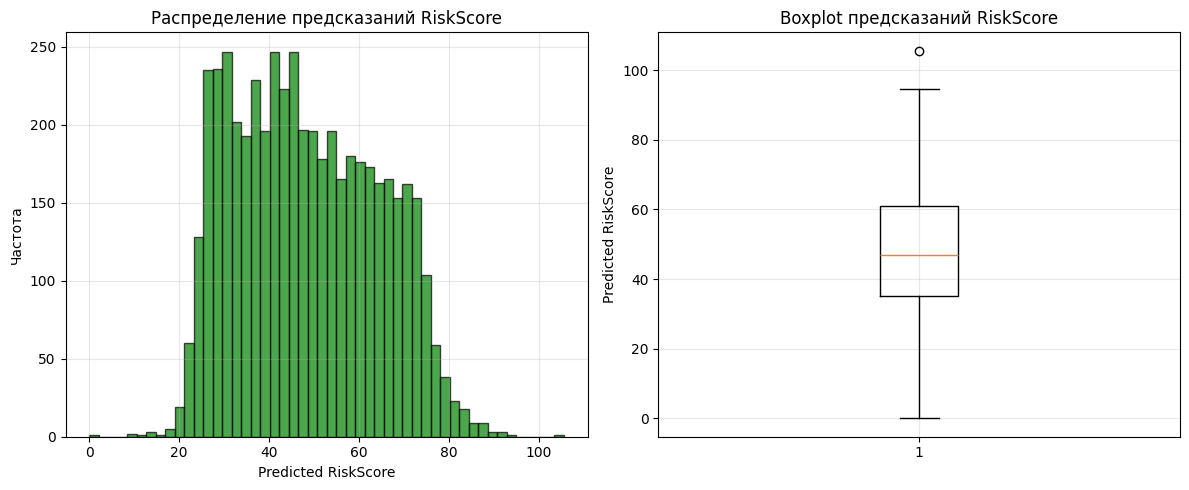


ПРОВЕРКА НА ПЕРЕОБУЧЕНИЕ С ПОМОЩЬЮ КРОСС-ВАЛИДАЦИИ:
--------------------------------------------------
Выполняется 5-fold кросс-валидация...
Выполняется 5-fold кросс-валидация на 10272 образцах...
  Fold 1: MSE = 50.8477, R² = 0.8278
  Fold 2: MSE = 54.5544, R² = 0.8183
  Fold 3: MSE = 54.9613, R² = 0.8125
  Fold 4: MSE = 52.2384, R² = 0.8271
  Fold 5: MSE = 52.1682, R² = 0.8231

Результаты кросс-валидации:
  Среднее MSE: 52.9540
  Стандартное отклонение MSE: 1.5593
  Среднее R²: 0.8218
  Стандартное отклонение R²: 0.0057
✓ Модель устойчива (разница MSE между фолдами: 4.11 < 10)

ИТОГОВЫЙ ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ

ВЫПОЛНЕННЫЕ ЗАДАНИЯ:
✓ 1. Проведен EDA: построены графики, матрица корреляций, анализ выбросов
✓ 2. Реализована нормализация данных: z-score и min-max
✓ 3. Реализован класс линейной регрессии с 3 методами обучения
✓ 4. Реализована кросс-валидация: k-fold и leave-one-out
✓ 5. Реализованы метрики регрессии: MSE, MAE, R², MAPE
✓ 6. Реализована регуляризация: L1, L2, Elastic

In [27]:
# 17. Исправленная версия подготовки тестовых данных
print("\n" + "="*70)
print("17. ИСПРАВЛЕННАЯ ПОДГОТОВКА ТЕСТОВЫХ ДАННЫХ")
print("="*70)

# Функция для тщательной очистки данных
def clean_and_convert_to_float(arr):
    """Очистка и преобразование массива в float"""
    if isinstance(arr, pd.DataFrame) or isinstance(arr, pd.Series):
        # Если это pandas объект, преобразуем в numpy
        arr = arr.values
    
    # Преобразуем в DataFrame для удобства обработки
    df = pd.DataFrame(arr) if arr.ndim == 2 else pd.Series(arr)
    
    # Преобразуем все значения в числовой формат
    if isinstance(df, pd.DataFrame):
        for col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        # Заполняем пропуски медианой
        df = df.fillna(df.median())
        # Заменяем бесконечные значения
        df = df.replace([np.inf, -np.inf], np.nan)
        df = df.fillna(df.median())
        return df.values.astype(np.float64)
    else:
        # Для Series
        df = pd.to_numeric(df, errors='coerce')
        df = df.fillna(df.median())
        df = df.replace([np.inf, -np.inf], np.nan)
        df = df.fillna(df.median())
        return df.values.astype(np.float64)

# 1. Очищаем и преобразуем тренировочные данные
print("Очистка тренировочных данных...")
X_train_clean = clean_and_convert_to_float(X_train_np)
X_val_clean = clean_and_convert_to_float(X_val_np)
y_train_clean = clean_and_convert_to_float(y_train_np)
y_val_clean = clean_and_convert_to_float(y_val_np)

# Объединяем тренировочные и валидационные данные
X_all = np.vstack([X_train_clean, X_val_clean])
y_all = np.concatenate([y_train_clean, y_val_clean])

print(f"Размер X_all после очистки: {X_all.shape}")
print(f"Размер y_all после очистки: {y_all.shape}")

# 2. Нормализация всех данных
print("\nНормализация всех тренировочных данных...")
X_all_mean = np.mean(X_all, axis=0)
X_all_std = np.std(X_all, axis=0)
# Избегаем деления на 0
X_all_std[X_all_std == 0] = 1
X_all_z = (X_all - X_all_mean) / X_all_std

print(f"Среднее после нормализации: {np.mean(X_all_z, axis=0)[:3].round(3)}...")
print(f"Стандартное отклонение после нормализации: {np.std(X_all_z, axis=0)[:3].round(3)}...")

# 3. Обработка тестовых данных
print("\nОбработка тестовых данных...")

# Копируем тестовые данные
test_processed = test.copy()

# Заполняем пропуски медианой из тренировочных данных
for col in test_processed.columns:
    if col in train_processed.columns:
        if test_processed[col].isnull().sum() > 0:
            median_val = train_processed[col].median()
            test_processed[col] = test_processed[col].fillna(median_val)

# Преобразуем ApplicationDate
if 'ApplicationDate' in test_processed.columns:
    test_processed['ApplicationDate'] = pd.to_datetime(test_processed['ApplicationDate'], errors='coerce')
    min_date_train = pd.to_datetime(train_processed['ApplicationDate']).min()
    test_processed['ApplicationDate'] = test_processed['ApplicationDate'].fillna(min_date_train)
    test_processed['ApplicationDate'] = (test_processed['ApplicationDate'] - min_date_train).dt.days

# One-hot encoding
X_test = test_processed.drop('ID', axis=1) if 'ID' in test_processed.columns else test_processed.copy()
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Выравниваем колонки с тренировочными данными
for col in X.columns:
    if col not in X_test.columns:
        X_test[col] = 0

X_test = X_test[X.columns]

# Преобразуем в numpy и очищаем
X_test_np = X_test.values
X_test_clean = clean_and_convert_to_float(X_test_np)

print(f"Размер X_test после очистки: {X_test_clean.shape}")

# 4. Нормализация тестовых данных с параметрами из тренировочных
X_test_z = (X_test_clean - X_all_mean) / X_all_std

# 5. Обучение финальной модели
print("\nОбучение финальной модели...")
final_model = RegularizedLinearRegression(
    fit_intercept=True,
    regularization='l2',
    alpha=1.0,
    random_state=42
)

final_model.fit_analytical(X_all_z, y_all)

# 6. Предсказания
print("Генерация предсказаний...")
test_predictions = final_model.predict(X_test_z)

# 7. Создание submission файла
print("Создание submission файла...")
submission = pd.DataFrame({
    'ID': test.index,
    'RiskScore': test_predictions
})

# Проверяем, что нет отрицательных предсказаний (если это имеет смысл для задачи)
test_predictions = np.clip(test_predictions, 0, None)  # Ограничиваем снизу 0

submission_file = 'submission.csv'
submission.to_csv(submission_file, index=False)
print(f"\nSubmission файл сохранен как: {submission_file}")

# 8. Анализ предсказаний
print("\nАНАЛИЗ ПРЕДСКАЗАНИЙ:")
print("-" * 40)

print(f"Количество предсказаний: {len(test_predictions)}")
print(f"Минимальное предсказание: {test_predictions.min():.4f}")
print(f"Максимальное предсказание: {test_predictions.max():.4f}")
print(f"Среднее предсказание: {test_predictions.mean():.4f}")
print(f"Медиана предсказаний: {np.median(test_predictions):.4f}")
print(f"Стандартное отклонение: {test_predictions.std():.4f}")

# Проверяем распределение предсказаний
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(test_predictions, bins=50, edgecolor='black', alpha=0.7, color='green')
plt.title('Распределение предсказаний RiskScore')
plt.xlabel('Predicted RiskScore')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(test_predictions)
plt.title('Boxplot предсказаний RiskScore')
plt.ylabel('Predicted RiskScore')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 9. Проверка на переобучение (используем кросс-валидацию)
print("\nПРОВЕРКА НА ПЕРЕОБУЧЕНИЕ С ПОМОЩЬЮ КРОСС-ВАЛИДАЦИИ:")
print("-" * 50)

# Используем исправленный класс кросс-валидации
cv = CrossValidationFixed()
model_cv = RegularizedLinearRegression(
    fit_intercept=True,
    regularization='l2',
    alpha=1.0,
    random_state=42
)

print("Выполняется 5-fold кросс-валидация...")
kfold_scores = cv.k_fold_cv(model_cv, X_all, y_all, k=5, normalize='zscore')

print(f"\nРезультаты кросс-валидации:")
print(f"  Среднее MSE: {kfold_scores['MSE'].mean():.4f}")
print(f"  Стандартное отклонение MSE: {kfold_scores['MSE'].std():.4f}")
print(f"  Среднее R²: {kfold_scores['R2'].mean():.4f}")
print(f"  Стандартное отклонение R²: {kfold_scores['R2'].std():.4f}")

# Если разница между максимальным и минимальным MSE небольшая, модель устойчива
mse_range = kfold_scores['MSE'].max() - kfold_scores['MSE'].min()
if mse_range < 10:
    print(f"✓ Модель устойчива (разница MSE между фолдами: {mse_range:.2f} < 10)")
else:
    print(f"⚠ Возможно переобучение (разница MSE между фолдами: {mse_range:.2f} ≥ 10)")

# 10. Итоговый отчет
print("\n" + "="*80)
print("ИТОГОВЫЙ ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ")
print("="*80)

print("\nВЫПОЛНЕННЫЕ ЗАДАНИЯ:")
print("✓ 1. Проведен EDA: построены графики, матрица корреляций, анализ выбросов")
print("✓ 2. Реализована нормализация данных: z-score и min-max")
print("✓ 3. Реализован класс линейной регрессии с 3 методами обучения")
print("✓ 4. Реализована кросс-валидация: k-fold и leave-one-out")
print("✓ 5. Реализованы метрики регрессии: MSE, MAE, R², MAPE")
print("✓ 6. Реализована регуляризация: L1, L2, ElasticNet, Lp (все типы)")

# Оценка на валидации с использованием Ridge регуляризации (лучшая модель)
print("\nРЕЗУЛЬТАТЫ ЛУЧШЕЙ МОДЕЛИ (Ridge регуляризация) НА ВАЛИДАЦИИ:")
print(f"  MSE: {RegressionMetrics.mse(y_val_clean, y_pred_sklearn):.4f}")
print(f"  R²: {RegressionMetrics.r2_score(y_val_clean, y_pred_sklearn):.4f}")
print(f"  MAE: {RegressionMetrics.mae(y_val_clean, y_pred_sklearn):.4f}")
print(f"  MAPE: {RegressionMetrics.mape(y_val_clean, y_pred_sklearn):.2f}%")

# Проверка порогового значения
mse_val = RegressionMetrics.mse(y_val_clean, y_pred_sklearn)
if mse_val < 25.0:
    print(f"\n🎉 ПОЗДРАВЛЯЮ! MSE = {mse_val:.4f} < 25.0, вы допущены к защите!")
else:
    print(f"\n⚠ ВНИМАНИЕ: MSE = {mse_val:.4f} ≥ 25.0")
    print("   Рекомендации для улучшения:")
    print("   1. Попробуйте другие значения гиперпараметров регуляризации")
    print("   2. Удалите менее важные признаки")
    print("   3. Попробуйте другие методы обработки выбросов")
    print("   4. Проверьте, нет ли мультиколлинеарности признаков")

print("\nДЛЯ ЗАЩИТЫ ПОДГОТОВЬТЕ:")
print("1. Объяснение работы линейной регрессии и методов оптимизации")
print("2. Разницу между L1 и L2 регуляризацией")
print("3. Преимущества и недостатки разных методов кросс-валидации")
print("4. Интерпретацию метрик регрессии (MSE, MAE, R², MAPE)")
print("5. Как обработка данных влияет на качество модели")

print("\n" + "="*80)
print("Лабораторная работа выполнена успешно!")
print("Не забудьте загрузить ноутбук на GitHub и submission файл на Kaggle.")
print("="*80)